In [1]:
# Import Libraries
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
from numpy import median, mean ,sum

#Statistics Library
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE 


In [2]:
#Read the csv file with utf-8 decoding
dfcolraw = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/Colonoscopyrecords.csv')
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID
0,1,69,19/03/2013,M,19
1,2,69,12/03/2013,F,19
2,3,69,05/03/2013,F,19
3,4,69,12/03/2013,M,19
4,5,69,12/03/2013,M,19


In [3]:
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41391 entries, 0 to 41390
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             41391 non-null  int64 
 1   Age            41391 non-null  int64 
 2   proceduredate  41391 non-null  object
 3   Gender         41391 non-null  object
 4   CLINICID       41391 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [4]:
dfcolraw.shape

(41391, 5)

In [5]:
dfcolavg=dfcolraw.groupby(['Age','proceduredate'])['ID'].count()


In [6]:
dfcolavg=pd.DataFrame(dfcolavg)

In [7]:
dfcolavg

ID
Age proceduredate    
53  25/07/2018      1
57  29/04/2015      1
58  07/02/2018      1
59  02/03/2017      1
    09/07/2018      1
...                ..
79  29/01/2023      2
80  02/03/2023      1
    12/07/2023      1
    14/12/2022      1
    15/05/2023      1

[21268 rows x 1 columns]

In [8]:
dfcolage=dfcolraw.groupby(['Age'])['ID'].agg(["count"])

In [9]:
dfcolage.shape

(25, 1)

In [10]:
dfcolage.describe()

,count
count,25.000000
mean,1655.640000
std,1684.220168
min,1.000000
25%,62.000000
50%,927.000000
75%,3160.000000
max,4915.000000


In [11]:
dfcolage=pd.DataFrame(dfcolage).reset_index()

In [12]:
dfcolage

,Age,count
0,53,1
1,57,1
2,58,1
3,59,4
4,60,3160
5,61,1716
6,62,2571
7,63,3281
8,64,3121
9,65,3386


In [13]:
dfcolraw.shape

(41391, 5)

In [14]:
dfcolraw['proceduredate']=pd.to_datetime(dfcolraw['proceduredate'])
dfcolraw['proceduredate'] =pd.to_datetime(dfcolraw['proceduredate'].dt.strftime('%d/%m/%Y'))


In [15]:
#Create a new column in dataframe that has the value of date and month combination
dfcolraw['day'] = [x.day for x in dfcolraw['proceduredate']]
dfcolraw['month'] = [x.month for x in dfcolraw['proceduredate']]
dfcolraw['year'] = [x.year for x in dfcolraw['proceduredate']]

# Display first five records
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year
0,1,69,2013-03-19,M,19,19,3,2013
1,2,69,2013-03-12,F,19,12,3,2013
2,3,69,2013-03-05,F,19,5,3,2013
3,4,69,2013-03-12,M,19,12,3,2013
4,5,69,2013-03-12,M,19,12,3,2013


In [16]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolraw['Monthname'] = dfcolraw['month'].map(monthsmap)
# Display first five records
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar


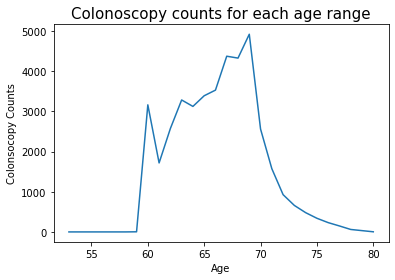

In [17]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

# define data values
x = dfcolage['Age']
y = dfcolage['count']

plt.plot(x, y) # Plot the chart
plt.xlabel('Age')
plt.ylabel('Colonsocopy Counts')
plt.title('Colonoscopy counts for each age range', fontsize=15)

plt.show() # display

In [18]:
#Create dataframe for each date
dfcoldate=dfcolraw.groupby(['proceduredate'])['ID'].agg(["count"]).reset_index()

In [19]:
dfcoldate

,proceduredate,count
0,2012-12-03,1
1,2013-02-20,3
2,2013-02-25,1
3,2013-03-01,3
4,2013-03-04,3
...,...,...
2693,2023-07-06,28
2694,2023-07-07,9
2695,2023-07-10,23
2696,2023-07-11,14


In [20]:
#Create dataframe for each Unit
dfcolclinic=dfcolraw.groupby(['CLINICID','Age'])['ID'].agg(["count"]).reset_index()

In [21]:
dfcolclinic

,CLINICID,Age,count
0,1,60,477
1,1,61,226
2,1,62,285
3,1,63,512
4,1,64,400
...,...,...,...
319,24,76,11
320,24,77,9
321,24,78,1
322,24,79,5


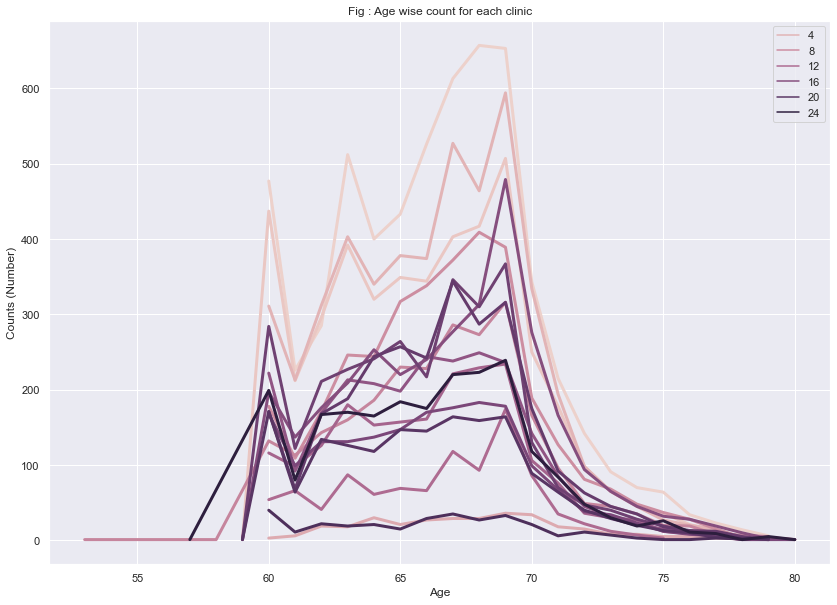

In [22]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcolclinic, x ='Age', y = 'count',
                  hue='CLINICID', lw=3) # Draw the plot

plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot

Text(0.5, 1.0, 'Box plot Administration')

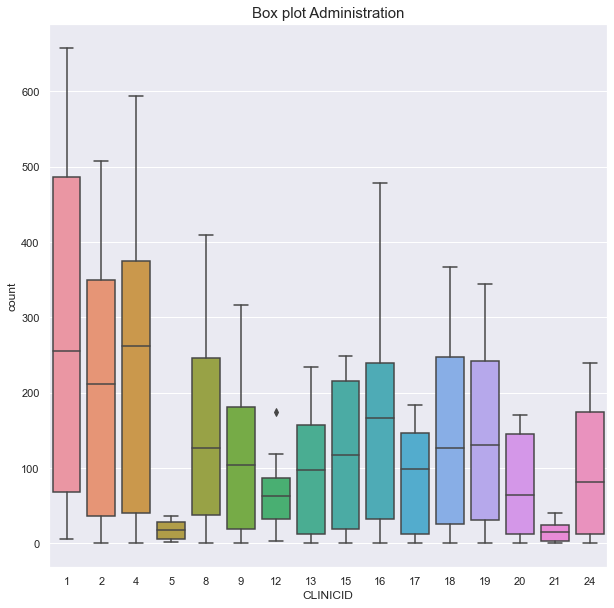

In [23]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'CLINICID', y ='count', data=dfcolclinic)
plt.title('Box plot Administration', fontsize=15)

In [24]:
#Create dataframe for each Unit
dfcolclinicpd=dfcolraw.groupby(['CLINICID','Age','proceduredate','Gender'])['ID'].agg(["count"]).reset_index()
dfcolclinicpd

,CLINICID,Age,proceduredate,Gender,count
0,1,60,2016-06-21,M,1
1,1,60,2016-07-12,M,1
2,1,60,2016-07-26,M,1
3,1,60,2016-08-09,M,1
4,1,60,2016-08-16,M,1
...,...,...,...,...,...
38000,24,79,2023-02-11,F,1
38001,24,79,2023-02-11,M,1
38002,24,79,2023-06-14,M,1
38003,24,79,2023-06-28,F,1


In [25]:
dfcolclinicpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38005 entries, 0 to 38004
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CLINICID       38005 non-null  int64         
 1   Age            38005 non-null  int64         
 2   proceduredate  38005 non-null  datetime64[ns]
 3   Gender         38005 non-null  object        
 4   count          38005 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ MB


In [26]:
dfcolclinicpd['proceduredate']=pd.to_datetime(dfcolclinicpd['proceduredate'])
dfcolclinicpd['proceduredate'] =pd.to_datetime(dfcolclinicpd['proceduredate'].dt.strftime('%d/%m/%Y'))


In [27]:
#Create a new column in dataframe that has the value of date and month combination
dfcolclinicpd['day'] = [x.day for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['month'] = [x.month for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['year'] = [x.year for x in dfcolclinicpd['proceduredate']]

# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year
0,1,60,2016-06-21,M,1,21,6,2016
1,1,60,2016-12-07,M,1,7,12,2016
2,1,60,2016-07-26,M,1,26,7,2016
3,1,60,2016-09-08,M,1,8,9,2016
4,1,60,2016-08-16,M,1,16,8,2016


In [28]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolclinicpd['Monthname'] = dfcolclinicpd['month'].map(monthsmap)
# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year,Monthname
0,1,60,2016-06-21,M,1,21,6,2016,June
1,1,60,2016-12-07,M,1,7,12,2016,Dec
2,1,60,2016-07-26,M,1,26,7,2016,July
3,1,60,2016-09-08,M,1,8,9,2016,Sep
4,1,60,2016-08-16,M,1,16,8,2016,Aug


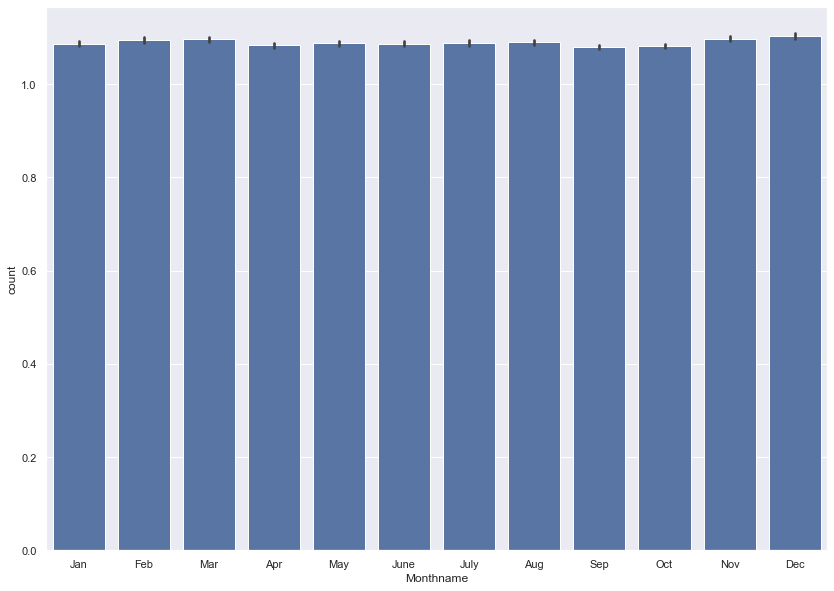

In [29]:
ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

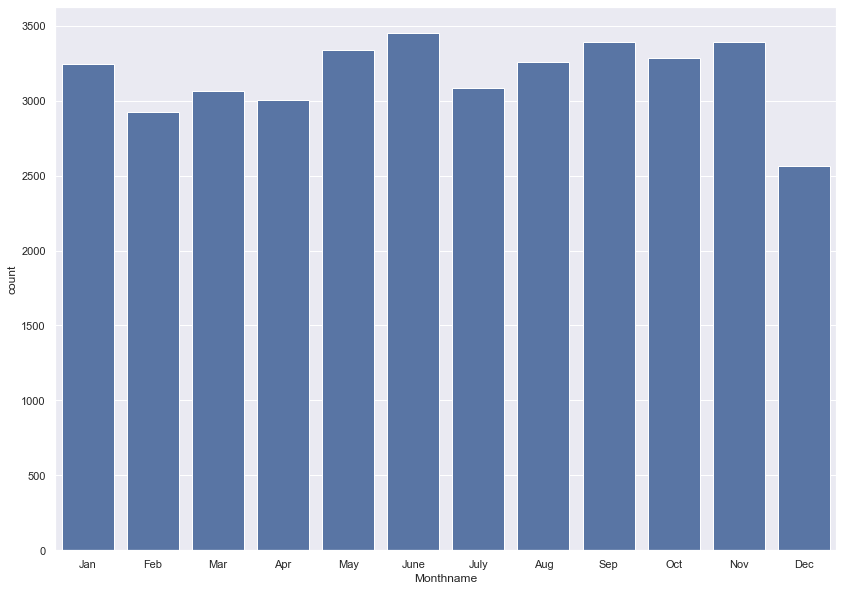

In [30]:
ax = sns.countplot(x="Monthname", data=dfcolclinicpd,  order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

In [31]:
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year,Monthname
0,1,60,2016-06-21,M,1,21,6,2016,June
1,1,60,2016-12-07,M,1,7,12,2016,Dec
2,1,60,2016-07-26,M,1,26,7,2016,July
3,1,60,2016-09-08,M,1,8,9,2016,Sep
4,1,60,2016-08-16,M,1,16,8,2016,Aug


<AxesSubplot:xlabel='Gender', ylabel='count'>

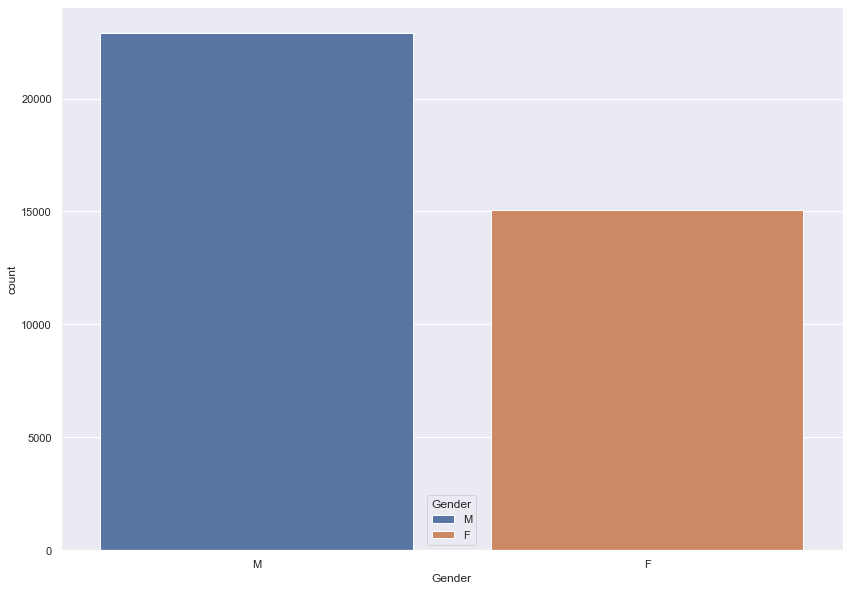

In [32]:
sns.countplot(x='Gender',hue='Gender',data=dfcolclinicpd,dodge=False)


In [33]:
y=dfcolclinicpd.groupby(['Gender'])['Gender'].count()
y

Gender
F    15086
M    22919
Name: Gender, dtype: int64

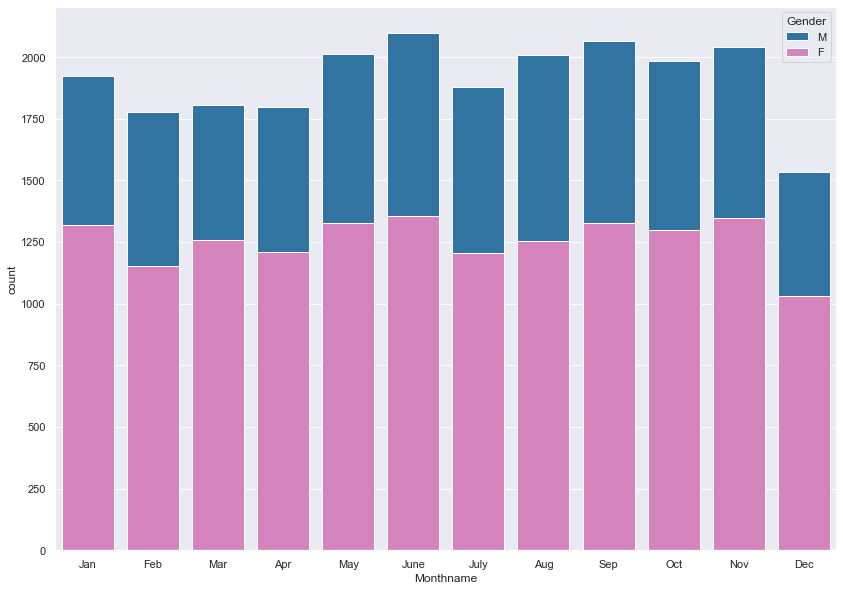

In [34]:
palette = {
    'M': 'tab:blue',
    'F': 'tab:pink',
}
ax= sns.countplot(x='Monthname',hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],data=dfcolclinicpd,dodge=False)

#ax = sns.barplot(x="Monthname", data=dfcolclinicpd,  ci=68,hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

In [35]:
#ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68,hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar
...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,30,6,2023,June
41387,41388,62,2023-07-12,F,18,12,7,2023,July
41388,41389,62,2023-07-12,M,13,12,7,2023,July
41389,41390,80,2023-07-12,M,13,12,7,2023,July


In [36]:

dfcolgenageyearaggregate=dfcolraw.groupby(['Gender','Age','year'])['ID'].count().reset_index()
dfcolgenageyearaggregate.tail()

,Gender,Age,year,ID
350,M,78,2022,20
351,M,78,2023,9
352,M,79,2022,10
353,M,79,2023,15
354,M,80,2023,3


In [37]:
dfcolraw.groupby(['year'])['ID'].count()

year
2012       1
2013    1420
2014    3352
2015    4014
2016    4004
2017    4353
2018    4378
2019    4457
2020    3154
2021    4236
2022    4816
2023    3206
Name: ID, dtype: int64

In [38]:
## Using pivot function, specify the index, columns, and the values. The purpose here is to replace the NaN values, logically for each country and animal type
dflspivot= dfcolgenageyearaggregate.pivot (index=['Gender','Age'],columns='year',values='ID').reset_index()
dflspivot.head()


year,Gender,Age,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,F,57,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F,59,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,F,60,NaN,NaN,2.0,1.0,105.0,278.0,243.0,217.0,84.0,129.0,185.0,113.0
3,F,61,NaN,NaN,2.0,3.0,238.0,101.0,52.0,33.0,29.0,43.0,99.0,56.0
4,F,62,NaN,NaN,14.0,51.0,149.0,96.0,137.0,228.0,85.0,93.0,95.0,127.0


In [39]:
print( dflspivot.columns) # for columns
print(dflspivot.index) # for row indexes

Index(['Gender',    'Age',     2012,     2013,     2014,     2015,     2016,
           2017,     2018,     2019,     2020,     2021,     2022,     2023],
      dtype='object', name='year')
RangeIndex(start=0, stop=47, step=1)


In [40]:
#Delete the 2012, 2013 and 2023 data since they are not complete and  might result in incorrect prediction
dflspivot = dflspivot.drop(dflspivot.columns[[2]],axis=1)
dflspivot = dflspivot.drop(dflspivot.columns[[2]],axis=1)
dflspivot = dflspivot.drop(dflspivot.columns[[11]],axis=1)
dflspivot

year,Gender,Age,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,F,57,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F,59,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,84.0,129.0,185.0
3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,29.0,43.0,99.0
4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,85.0,93.0,95.0
5,F,63,20.0,222.0,256.0,91.0,196.0,152.0,60.0,128.0,178.0
6,F,64,63.0,163.0,126.0,83.0,135.0,121.0,78.0,152.0,160.0
7,F,65,85.0,175.0,105.0,154.0,209.0,126.0,90.0,174.0,123.0
8,F,66,153.0,223.0,105.0,159.0,152.0,110.0,100.0,141.0,146.0
9,F,67,206.0,265.0,96.0,166.0,143.0,158.0,131.0,156.0,190.0


In [41]:
#There are more NULL values, these are the cases where for a country for all the years there is nothing submitted, we will mark such NaN as 0.

dflspivot.sort_values(by='Age', inplace=True) 

colnames=dflspivot.columns.values
for i in colnames:
    dflspivot[i] = dflspivot[i].replace(np.nan, 0)

In [42]:
dflspivot.reset_index()

year,index,Gender,Age,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,23,M,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,F,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,M,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,25,M,59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,F,59,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,26,M,60,1.0,0.0,169.0,374.0,303.0,279.0,135.0,168.0,252.0
6,2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,84.0,129.0,185.0
7,3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,29.0,43.0,99.0
8,27,M,61,3.0,7.0,366.0,160.0,113.0,64.0,47.0,73.0,149.0
9,28,M,62,10.0,75.0,216.0,141.0,137.0,313.0,128.0,137.0,150.0


In [43]:
print (dflspivot.columns.tolist())

['Gender', 'Age', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [44]:
dflspivot=dflspivot[['Gender','Age',2014,2015,2016,2017,2018,2019,2020,2021,2022]]
dflspivot.head()

year,Gender,Age,2014,2015,2016,2017,2018,2019,2020,2021,2022
23,M,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,F,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,M,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25,M,59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,F,59,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [45]:
dflspivotgt60=dflspivot[['Gender','Age',2016,2017,2018,2019,2020,2021,2022]].loc[dflspivot['Age']>=60]
dflspivotlt69=dflspivotgt60[['Gender','Age',2016,2017,2018,2019,2020,2021,2022]].loc[dflspivotgt60['Age']<=69]
dflspivotlt69.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 26 to 35
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  20 non-null     object 
 1   Age     20 non-null     int64  
 2   2016    20 non-null     float64
 3   2017    20 non-null     float64
 4   2018    20 non-null     float64
 5   2019    20 non-null     float64
 6   2020    20 non-null     float64
 7   2021    20 non-null     float64
 8   2022    20 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.6+ KB


In [46]:
dflspivotlt69['mean'] = dflspivotlt69.iloc[:, 2:8].mean(axis=1)
dflspivotcm=dflspivotlt69.copy()


In [47]:
dflspivotlt69

year,Gender,Age,2016,2017,2018,2019,2020,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,135.0,168.0,252.0,238.000000
2,F,60,105.0,278.0,243.0,217.0,84.0,129.0,185.0,176.000000
3,F,61,238.0,101.0,52.0,33.0,29.0,43.0,99.0,82.666667
27,M,61,366.0,160.0,113.0,64.0,47.0,73.0,149.0,137.166667
28,M,62,216.0,141.0,137.0,313.0,128.0,137.0,150.0,178.666667
4,F,62,149.0,96.0,137.0,228.0,85.0,93.0,95.0,131.333333
29,M,63,352.0,144.0,263.0,191.0,116.0,170.0,208.0,206.000000
5,F,63,256.0,91.0,196.0,152.0,60.0,128.0,178.0,147.166667
30,M,64,198.0,119.0,232.0,181.0,107.0,278.0,230.0,185.833333
6,F,64,126.0,83.0,135.0,121.0,78.0,152.0,160.0,115.833333


In [48]:
gendermap = {'M':1, 'F':2}
dflspivotcm['Gender'] = dflspivotcm['Gender'].map(gendermap)
dflspivotcm

year,Gender,Age,2016,2017,2018,2019,2020,2021,2022,mean
26,1,60,169.0,374.0,303.0,279.0,135.0,168.0,252.0,238.000000
2,2,60,105.0,278.0,243.0,217.0,84.0,129.0,185.0,176.000000
3,2,61,238.0,101.0,52.0,33.0,29.0,43.0,99.0,82.666667
27,1,61,366.0,160.0,113.0,64.0,47.0,73.0,149.0,137.166667
28,1,62,216.0,141.0,137.0,313.0,128.0,137.0,150.0,178.666667
4,2,62,149.0,96.0,137.0,228.0,85.0,93.0,95.0,131.333333
29,1,63,352.0,144.0,263.0,191.0,116.0,170.0,208.0,206.000000
5,2,63,256.0,91.0,196.0,152.0,60.0,128.0,178.0,147.166667
30,1,64,198.0,119.0,232.0,181.0,107.0,278.0,230.0,185.833333
6,2,64,126.0,83.0,135.0,121.0,78.0,152.0,160.0,115.833333


In [49]:
dflspivotlt69.head()

year,Gender,Age,2016,2017,2018,2019,2020,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,135.0,168.0,252.0,238.000000
2,F,60,105.0,278.0,243.0,217.0,84.0,129.0,185.0,176.000000
3,F,61,238.0,101.0,52.0,33.0,29.0,43.0,99.0,82.666667
27,M,61,366.0,160.0,113.0,64.0,47.0,73.0,149.0,137.166667
28,M,62,216.0,141.0,137.0,313.0,128.0,137.0,150.0,178.666667


year       Age      2016      2017      2018      2019      2020      2021  \
year                                                                         
Age   1.000000 -0.308279  0.200155 -0.000549  0.231453  0.680443  0.427394   
2016 -0.308279  1.000000 -0.098762  0.058134 -0.057872 -0.182485 -0.074930   
2017  0.200155 -0.098762  1.000000  0.636784  0.617920  0.640235  0.424990   
2018 -0.000549  0.058134  0.636784  1.000000  0.545108  0.426734  0.701116   
2019  0.231453 -0.057872  0.617920  0.545108  1.000000  0.747702  0.506240   
2020  0.680443 -0.182485  0.640235  0.426734  0.747702  1.000000  0.675461   
2021  0.427394 -0.074930  0.424990  0.701116  0.506240  0.675461  1.000000   
2022  0.417008  0.116710  0.682446  0.603525  0.613625  0.682028  0.639758   
mean  0.260554  0.193903  0.787548  0.811912  0.812358  0.774801  0.751419   

year      2022      mean  
year                      
Age   0.417008  0.260554  
2016  0.116710  0.193903  
2017  0.682446  0.787548  
2018  

<AxesSubplot:title={'center':'Corelation Matrix between Variables'}, xlabel='year', ylabel='year'>

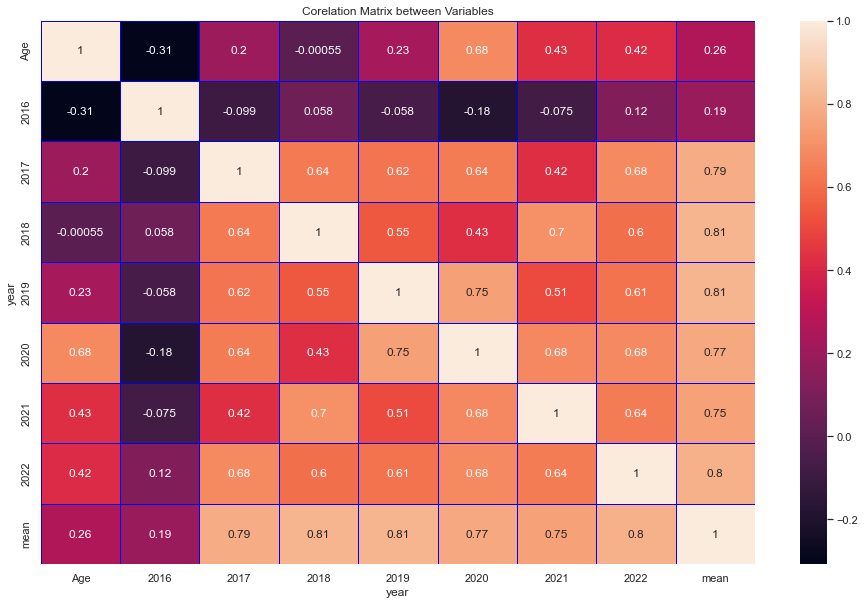

In [50]:
#Plot the co-relation matrix
correlation = dflspivotlt69.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [51]:
dflspivotcm2=dfcolraw.copy()
dflspivotcm2.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar


In [52]:
dflspivotcm2=dflspivotcm2[['ID','Age','Gender','month']]
dflspivotcm2['Gender'] = dflspivotcm2['Gender'].map(gendermap)
dflspivotcm2=dflspivotcm2.groupby(['Age','Gender','month'])['ID'].count().reset_index()

dflspivotcm2

,Age,Gender,month,ID
0,53,1,7,1
1,57,2,4,1
2,58,1,2,1
3,59,1,3,1
4,59,1,7,1
...,...,...,...,...
478,79,2,12,1
479,80,1,3,1
480,80,1,5,1
481,80,1,7,1


             Age    Gender     month        ID
Age     1.000000 -0.008687  0.017469 -0.608834
Gender -0.008687  1.000000  0.015907 -0.247323
month   0.017469  0.015907  1.000000  0.003497
ID     -0.608834 -0.247323  0.003497  1.000000


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}>

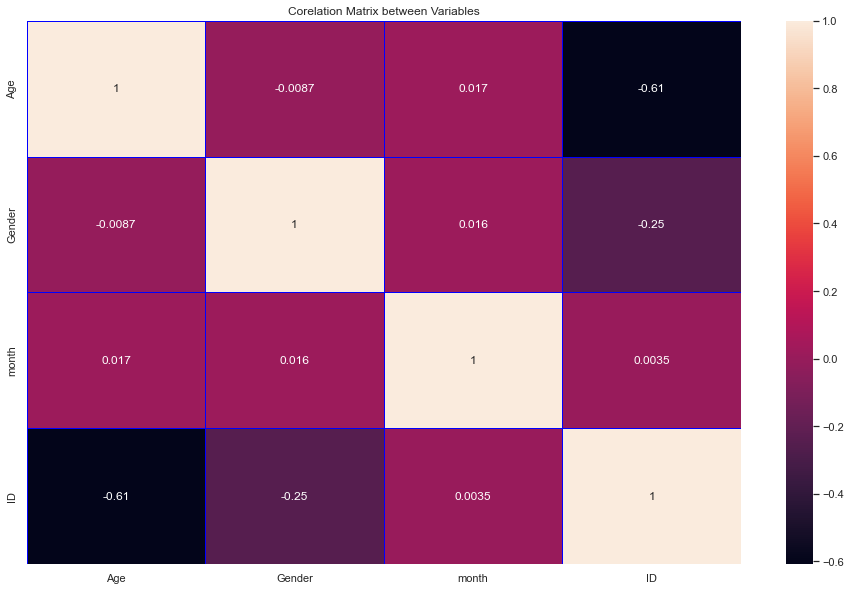

In [53]:
#Plot the co-relation matrix
correlation = dflspivotcm2.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [54]:
dfcolmean=dflspivotlt69[['Gender','Age','mean']]
dfcolmean

year,Gender,Age,mean
26,M,60,238.000000
2,F,60,176.000000
3,F,61,82.666667
27,M,61,137.166667
28,M,62,178.666667
4,F,62,131.333333
29,M,63,206.000000
5,F,63,147.166667
30,M,64,185.833333
6,F,64,115.833333


In [55]:
#Import Census Data

#Read the csv file with utf-8 decoding
dfcensusm = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/EligiblePopulation_Male_Msc.csv')
dfcensusf = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/EligiblePopulation_Female_Msc.csv')



dfcensusm

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E
0,40,M,40301,41401,41644,39275,37940,37710,37289,37053,36472,36650
1,41,M,41401,41644,39275,37940,37710,37289,37053,36472,36650,36050
2,42,M,41644,39275,37940,37710,37289,37053,36472,36650,36050,34926
3,43,M,39275,37940,37710,37289,37053,36472,36650,36050,34926,34356
4,44,M,37940,37710,37289,37053,36472,36650,36050,34926,34356,32611
5,45,M,37710,37289,37053,36472,36650,36050,34926,34356,32611,32050
6,46,M,37289,37053,36472,36650,36050,34926,34356,32611,32050,31353
7,47,M,37053,36472,36650,36050,34926,34356,32611,32050,31353,30684
8,48,M,36472,36650,36050,34926,34356,32611,32050,31353,30684,30891
9,49,M,36650,36050,34926,34356,32611,32050,31353,30684,30891,29775


In [56]:
dfcensusm['meanE'] = dfcensusm.iloc[:, 2:8].mean(axis=1) # Only until 2014 is considered for mean
dfcensusm.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E,meanE
0,40,M,40301,41401,41644,39275,37940,37710,37289,37053,36472,36650,39711.833333
1,41,M,41401,41644,39275,37940,37710,37289,37053,36472,36650,36050,39209.833333
2,42,M,41644,39275,37940,37710,37289,37053,36472,36650,36050,34926,38485.166667
3,43,M,39275,37940,37710,37289,37053,36472,36650,36050,34926,34356,37623.166667
4,44,M,37940,37710,37289,37053,36472,36650,36050,34926,34356,32611,37185.666667


In [57]:
dfcensusf['meanE'] = dfcensusf.iloc[:, 2:8].mean(axis=1) # Only until 2014 is considered for mean
dfcensusf.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E,meanE
0,40,F,43143,43696,43337,41408,39379,38506,38127,37471,37145,37081,41578.166667
1,41,F,43696,43337,41408,39379,38506,38127,37471,37145,37081,36199,40742.166667
2,42,F,43337,41408,39379,38506,38127,37471,37145,37081,36199,35025,39704.666667
3,43,F,41408,39379,38506,38127,37471,37145,37081,36199,35025,34414,38672.666667
4,44,F,39379,38506,38127,37471,37145,37081,36199,35025,34414,32204,37951.500000


In [58]:
#Data frame to only take mean
dfcensusmmean=dfcensusm[['Age','Gender','meanE']]
dfcensusfmean=dfcensusf[['Age','Gender','meanE']]

In [59]:
#Let us take mean data for the eligible population in census
dfcensusmmean=dfcensusmmean.loc[dfcensusm['Age']>=60]
dfcensusmmean

,Age,Gender,meanE
20,60,M,26555.166667
21,61,M,25772.500000
22,62,M,25068.833333
23,63,M,24299.833333
24,64,M,23751.500000
25,65,M,23105.833333
26,66,M,22364.000000
27,67,M,21731.666667
28,68,M,20980.666667
29,69,M,20312.500000


In [60]:
#dfcensusmmean=dfcensusmmean.loc[dfcensusm2019['Age']<70]


In [61]:
#Let us take 2019 data which is most reliable since it is latest year pre-covid and expect same tendency to continue from 2024 if the age range is untouched.
dfcensusf2019=dfcensusf[['Age','Gender','2019E']].loc[dfcensusf['Age']>=60]
dfcensusf2019=dfcensusf2019[['Age','Gender','2019E']].loc[dfcensusf2019['Age']<70]
dfcensusf2019

,Age,Gender,2019E
20,60,F,26312
21,61,F,26109
22,62,F,25183
23,63,F,24662
24,64,F,24524
25,65,F,23018
26,66,F,23375
27,67,F,21897
28,68,F,21236
29,69,F,21159


In [62]:
dfcensusmean = [dfcensusmmean, dfcensusfmean]

In [63]:
dfcensusmean=pd.concat(dfcensusmean)


In [64]:
dfcensusmean.reset_index(drop=True)


,Age,Gender,meanE
0,60,M,26555.166667
1,61,M,25772.500000
2,62,M,25068.833333
3,63,M,24299.833333
4,64,M,23751.500000
...,...,...,...
77,86,F,4906.666667
78,87,F,3656.500000
79,88,F,2528.833333
80,89,F,1541.000000


In [65]:
dfcolmean.reset_index(drop=True)

year,Gender,Age,mean
0,M,60,238.000000
1,F,60,176.000000
2,F,61,82.666667
3,M,61,137.166667
4,M,62,178.666667
5,F,62,131.333333
6,M,63,206.000000
7,F,63,147.166667
8,M,64,185.833333
9,F,64,115.833333


In [66]:
print( dfcolmean.columns) # for columns
#print(dfcolmean.index) # for row indexes

Index(['Gender', 'Age', 'mean'], dtype='object', name='year')


In [67]:
dfcolmean = dfcolmean.rename_axis(columns=None)
dfcolmean.reset_index(drop=True)

,Gender,Age,mean
0,M,60,238.000000
1,F,60,176.000000
2,F,61,82.666667
3,M,61,137.166667
4,M,62,178.666667
5,F,62,131.333333
6,M,63,206.000000
7,F,63,147.166667
8,M,64,185.833333
9,F,64,115.833333


In [68]:
dfcolmean.reset_index(inplace=True, drop=True)
dfcensusmean.reset_index(inplace=True, drop=True)

In [69]:
dfcensusmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     82 non-null     int64  
 1   Gender  82 non-null     object 
 2   meanE   82 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [70]:
result = pd.merge(dfcolmean, dfcensusmean, on=["Age", "Gender"])

In [71]:
result['percent']=result['mean']*100/result['meanE']

In [72]:
result

,Gender,Age,mean,meanE,percent
0,M,60,238.000000,26555.166667,0.896247
1,F,60,176.000000,27237.000000,0.646180
2,F,61,82.666667,26503.500000,0.311908
3,M,61,137.166667,25772.500000,0.532221
4,M,62,178.666667,25068.833333,0.712704
5,F,62,131.333333,25781.500000,0.509409
6,M,63,206.000000,24299.833333,0.847742
7,F,63,147.166667,24968.000000,0.589421
8,M,64,185.833333,23751.500000,0.782407
9,F,64,115.833333,24478.500000,0.473204


In [73]:
result.groupby(['Gender']).mean()


,Age,mean,meanE,percent
Gender,,,,
F,64.5,136.316667,24136.466667,0.570028
M,64.5,209.183333,23394.250000,0.908012


In [74]:
#Data frame to only take mean
dfcensusmall=dfcensusm[['Age','Gender','meanE']]
dfcensusfall=dfcensusf[['Age','Gender','meanE']]

In [75]:
conact1 = [dfcensusmall, dfcensusfall]
dfcensusall=pd.concat(conact1)
dfcensus5569=dfcensusall.loc[(dfcensusall['Age']>=55) & (dfcensusall['Age']<70)]



In [76]:

import numpy as np

dfcensus5569['Projectedcol'] = np.where(dfcensus5569['Gender']=='M', dfcensus5569['meanE']*0.91/100, dfcensus5569['meanE']*0.57/100)

dfcensus5569.reset_index(drop=True,inplace=True)
dfcensus5569

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,273.536900
1,56,M,29475.000000,268.222500
2,57,M,28880.333333,262.811033
3,58,M,28045.833333,255.217083
4,59,M,27271.166667,248.167617
5,60,M,26555.166667,241.652017
6,61,M,25772.500000,234.529750
7,62,M,25068.833333,228.126383
8,63,M,24299.833333,221.128483
9,64,M,23751.500000,216.138650


                   Age     meanE  Projectedcol
Age           1.000000 -0.991809     -0.480555
meanE        -0.991809  1.000000      0.371153
Projectedcol -0.480555  0.371153      1.000000


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}>

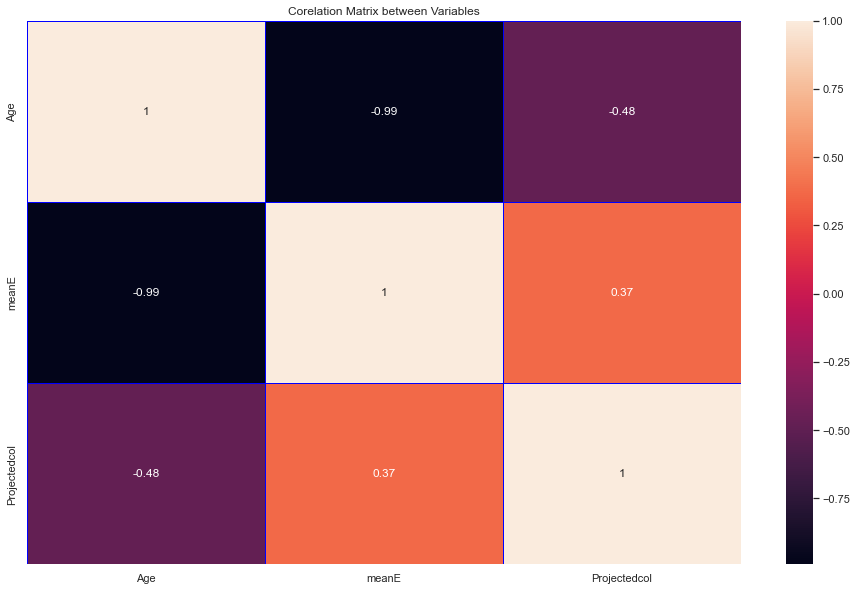

In [77]:
#Plot the co-relation matrix
correlation = dfcensus5569.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [78]:
#There is a corerelation of 0.37 bewteen the census number snad the projected colonoscopies

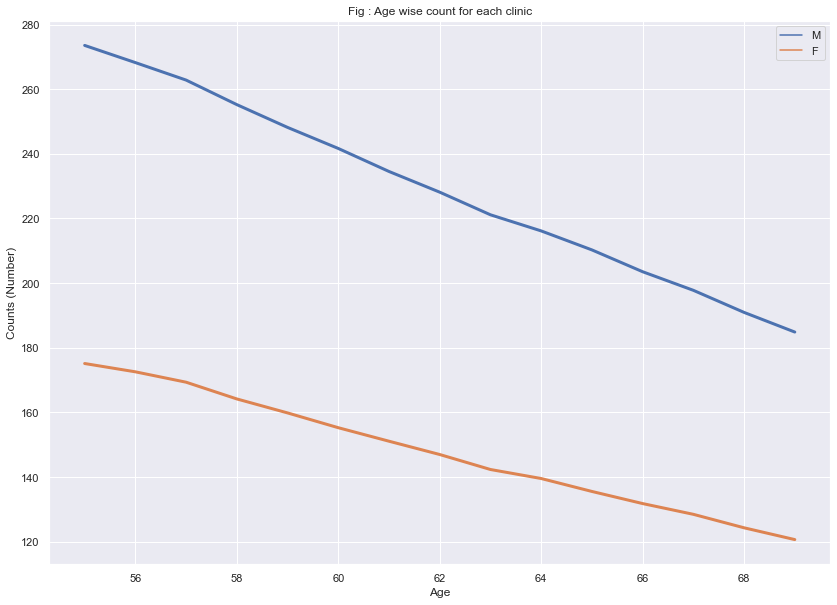

In [79]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcensus5569, x ='Age', y = 'Projectedcol',
                  hue='Gender', lw=3) # Draw the plot
plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot


In [80]:
# Next step use seperate populations for M and F, see the total count from dfcensus5569, 
#see above for the average in the sample and do a hypothesis testing for the expected total

# Hypothesis Testing

In [81]:
#Statistics Library
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Sample 1: Male population between 60-69



In [82]:
# Mean =209

In [83]:
# create 90% confidence interval, use the scipy.stats
st.t.interval(alpha=0.90, 
              df=1, # Dataframe length
              loc=209, # mean average for male population 60-69
              scale = 4
              )

(183.74499394079623, 234.25500605920374)

In [84]:
# create 95% confidence interval, use the scipy.stats
st.t.interval(alpha=0.95, 
              df=1, # Dataframe length
              loc=209, # mean average for Live Poultry from 2012 - 2020 
              scale = 4
              )

(158.1751810542716, 259.8248189457284)

In [85]:
# As seen above at 90% CI the colonoscopies vary between 183 to 234.
# Now, taking the whole population from 55-70, we see in the chart male population max is 275. Doing a T-Test for one population

In [86]:
#Get the projected values from the populations for Male
X=dfcensus5569['Projectedcol'].loc[(dfcensus5569['Gender']=='M')]




In [87]:
#H0 : u = 275
#H1 : u < 275
#stats.ttest_1samp(X,mu of H0)
st.ttest_1samp(X,275)

Ttest_1sampResult(statistic=-6.195641472339939, pvalue=2.33125887548552e-05)

In [88]:
# Hypothesis is rejected since p value is less than 0.05

In [89]:
#H1 : u > 230
st.t.sf(-6.195641472339939, 8)

0.9998696682756691

In [90]:
# T Test shows the max number of colonoscopies for M is greater than 230

<Figure size 1008x720 with 0 Axes>

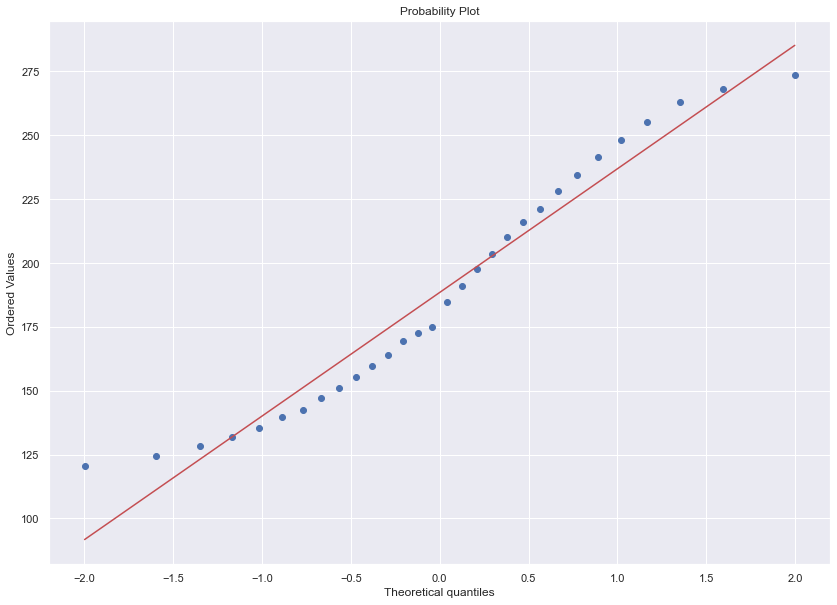

<Figure size 1008x720 with 0 Axes>

In [91]:
#Normality plot. Our variable is "charges"

st.probplot(dfcensus5569.Projectedcol, plot=plt)
plt.figure()

# Sample 2: Female population between 60-69


In [92]:
#mean = 136

# create 90% confidence interval, use the scipy.stats
st.t.interval(alpha=0.90, 
              df=1, # Dataframe length
              loc=136, # mean average for male population 60-69
              scale = 4
              )

(110.74499394079623, 161.25500605920374)

In [93]:
#Get the projected values from the populations for Female
X=dfcensus5569['Projectedcol'].loc[(dfcensus5569['Gender']=='F')]

In [94]:
#H0 : u = 161
#H1 : u > 110
#stats.ttest_1samp(X,mu of H0)
st.ttest_1samp(X,161)

Ttest_1sampResult(statistic=-2.8640589660047233, pvalue=0.012498398182906826)

In [95]:
#H1 : u > 110
st.t.sf(-2.8640589660047233, 8)

0.9894900518884822

In [96]:
#ANOVA TWO WAYS
#H0 : Variances of Mean value for the age and gender are same
#H1 : Variances of Mean value for the age and gender are different
  
model2 = ols('Projectedcol~Age+Gender', data = dfcensus5569).fit()
aov2 = sm.stats.anova_lm(model2, type=2)
print(aov2)

            df        sum_sq       mean_sq            F        PR(>F)
Gender     1.0  49620.847462  49620.847462  1602.412102  1.401546e-25
Age        1.0  15151.074495  15151.074495   489.275504  7.808891e-19
Residual  27.0    836.091340     30.966346          NaN           NaN


# Dataset for Machine Learning model time series

In [97]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar
...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,30,6,2023,June
41387,41388,62,2023-07-12,F,18,12,7,2023,July
41388,41389,62,2023-07-12,M,13,12,7,2023,July
41389,41390,80,2023-07-12,M,13,12,7,2023,July


In [98]:
dfcolraw.loc[(dfcolraw['Age']>=55)&(dfcolraw['Age']<70)].groupby(['Age','Gender','proceduredate','month','year'])['ID'].agg(["count"]).reset_index()


#dfcensus5569=dfcensusall.loc[(dfcensusall['Age']>=55) & (dfcensusall['Age']<70)]


,Age,Gender,proceduredate,month,year,count
0,57,F,2015-04-29,4,2015,1
1,58,M,2018-02-07,2,2018,1
2,59,F,2017-03-02,3,2017,1
3,59,F,2018-09-18,9,2018,1
4,59,M,2018-07-09,7,2018,1
...,...,...,...,...,...,...
22307,69,M,2023-07-04,7,2023,1
22308,69,M,2023-07-05,7,2023,1
22309,69,M,2023-07-06,7,2023,1
22310,69,M,2023-07-10,7,2023,1


In [99]:
dfcolraw['day']=1
#dfcolraw['firstdate']=dfcolraw['firstdate'].astype(Date)
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41391 entries, 0 to 41390
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             41391 non-null  int64         
 1   Age            41391 non-null  int64         
 2   proceduredate  41391 non-null  datetime64[ns]
 3   Gender         41391 non-null  object        
 4   CLINICID       41391 non-null  int64         
 5   day            41391 non-null  int64         
 6   month          41391 non-null  int64         
 7   year           41391 non-null  int64         
 8   Monthname      41391 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.8+ MB


In [100]:
#dfcolraw['firstdate']=pd.to_datetime(dfcolraw[["year", "month", "day"]], format='%d%b%Y')

In [101]:
dfcolraw['Quarterdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='Q').to_timestamp()
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate
0,1,69,2013-03-19,M,19,1,3,2013,Mar,2013-01-01
1,2,69,2013-03-12,F,19,1,3,2013,Mar,2013-01-01
2,3,69,2013-03-05,F,19,1,3,2013,Mar,2013-01-01
3,4,69,2013-03-12,M,19,1,3,2013,Mar,2013-01-01
4,5,69,2013-03-12,M,19,1,3,2013,Mar,2013-01-01
...,...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,1,6,2023,June,2023-04-01
41387,41388,62,2023-07-12,F,18,1,7,2023,July,2023-07-01
41388,41389,62,2023-07-12,M,13,1,7,2023,July,2023-07-01
41389,41390,80,2023-07-12,M,13,1,7,2023,July,2023-07-01


In [102]:
dfcolraw['Weekdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='W').to_timestamp()
dfcolraw['Monthdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='M').to_timestamp()

dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1,69,2013-03-19,M,19,1,3,2013,Mar,2013-01-01,2013-03-18,2013-03-01
1,2,69,2013-03-12,F,19,1,3,2013,Mar,2013-01-01,2013-03-11,2013-03-01
2,3,69,2013-03-05,F,19,1,3,2013,Mar,2013-01-01,2013-03-04,2013-03-01
3,4,69,2013-03-12,M,19,1,3,2013,Mar,2013-01-01,2013-03-11,2013-03-01
4,5,69,2013-03-12,M,19,1,3,2013,Mar,2013-01-01,2013-03-11,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,1,6,2023,June,2023-04-01,2023-06-26,2023-06-01
41387,41388,62,2023-07-12,F,18,1,7,2023,July,2023-07-01,2023-07-10,2023-07-01
41388,41389,62,2023-07-12,M,13,1,7,2023,July,2023-07-01,2023-07-10,2023-07-01
41389,41390,80,2023-07-12,M,13,1,7,2023,July,2023-07-01,2023-07-10,2023-07-01


In [103]:
dfcolraw.groupby(['Monthdate'])['ID'].count()

Monthdate
2012-12-01      1
2013-02-01      4
2013-03-01     51
2013-04-01     38
2013-05-01     82
             ... 
2023-03-01    577
2023-04-01    419
2023-05-01    586
2023-06-01    431
2023-07-01    162
Name: ID, Length: 127, dtype: int64

In [104]:
#Changethe Date field to pandas datetime
#dfcolraw['proceduredate'] = pd.to_datetime(dfcolraw['proceduredate'], format='%d/%m/%Y')

df_timeseries = dfcolraw.groupby(['Quarterdate','Age','Gender'])['ID'].count().reset_index()
#dfcolraw.groupby(['Age','proceduredate'])['ID'].count()
df_timeseries

,Quarterdate,Age,Gender,ID
0,2012-10-01,67,M,1
1,2013-01-01,67,F,3
2,2013-01-01,67,M,1
3,2013-01-01,68,F,7
4,2013-01-01,68,M,5
...,...,...,...,...
1272,2023-07-01,75,F,1
1273,2023-07-01,75,M,4
1274,2023-07-01,76,M,1
1275,2023-07-01,79,F,1


In [105]:
dfcensus5560=dfcensus5569[['Age','Gender','Projectedcol']].loc[(dfcensus5569['Age']>=55) & (dfcensus5569['Age']<61)]

In [106]:
dfcensus5560

,Age,Gender,Projectedcol
0,55,M,273.536900
1,56,M,268.222500
2,57,M,262.811033
3,58,M,255.217083
4,59,M,248.167617
5,60,M,241.652017
15,55,F,175.112550
16,56,F,172.540900
17,57,F,169.329900
18,58,F,164.150500


In [107]:
df_timeseries = df_timeseries.set_index('Quarterdate')
df_timeseries.head(20)

,Age,Gender,ID
Quarterdate,,,
2012-10-01,67,M,1
2013-01-01,67,F,3
2013-01-01,67,M,1
2013-01-01,68,F,7
2013-01-01,68,M,5
2013-01-01,69,F,10
2013-01-01,69,M,23
2013-01-01,70,F,2
2013-01-01,70,M,4


In [108]:
print(f'Number of rows with missing values: {df_timeseries.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [109]:
df_timeseriesQD = dfcolraw.groupby(['Quarterdate'])['ID'].count()
#df_timeseriesQD=df_timeseriesQD.set_index(Quarterdate)
df_timeseriesQD=pd.DataFrame(df_timeseriesQD)
df_timeseriesQD.head(2)

,ID
Quarterdate,
2012-10-01,1
2013-01-01,55


In [110]:
train = df_timeseriesQD[(df_timeseriesQD.index < pd.to_datetime("2021-01-01", format='%Y-%m-%d')) ]
test = df_timeseriesQD[df_timeseriesQD.index >= pd.to_datetime("2021-01-01", format='%Y-%m-%d')]
# Split data into train-test
# ==============================================================================
steps = 36
#train = df_timeseriesQD[:-steps]
#test  = df_timeseriesQD[-steps:]
print(train.shape)
print(test.shape)
test

(33, 1)
(11, 1)


,ID
Quarterdate,
2021-01-01,811
2021-04-01,1068
2021-07-01,1185
2021-10-01,1172
2022-01-01,1109
2022-04-01,1107
2022-07-01,1253
2022-10-01,1347
2023-01-01,1608


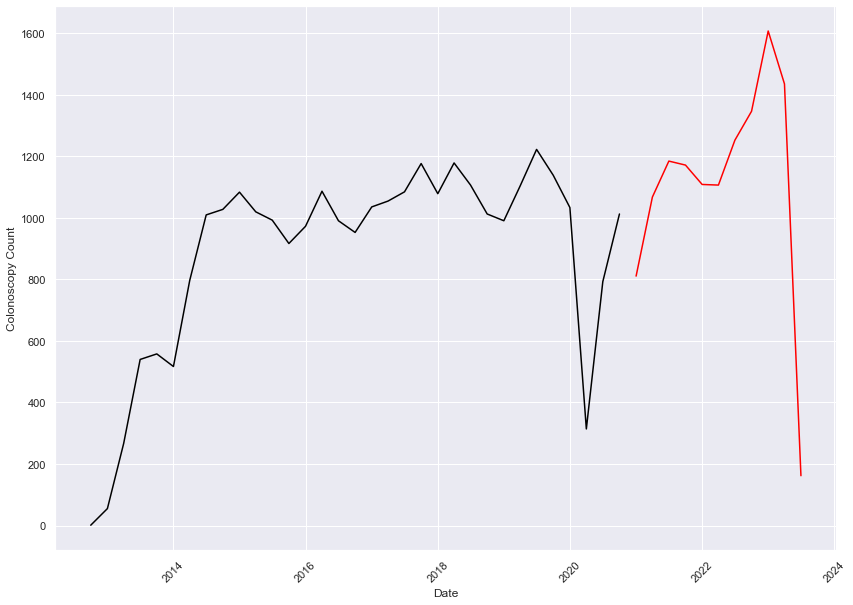

In [111]:
plt.plot(train[['ID']], color = "black", label = 'Training')
plt.plot(test[['ID']], color = "red", label = 'Testing')
plt.ylabel('Colonoscopy Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title="Train/Test split for Sentiment"
plt.show()

In [112]:
# The above graph shows there is no seasonality and trend, checking for stationary next using ADF Test

In [113]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test for stationary where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.
result = adfuller(train.ID.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.3641335143851157
p-value: 0.012244042336547705
Critial Values:
   1%, -3.6699197407407405
Critial Values:
   5%, -2.9640707407407407
Critial Values:
   10%, -2.621171111111111


In [114]:
# ADF test shows p-value less than 0.05 hene the hypothesis is rejected and stationary is confirmed

In [115]:
#dfri=train.reset_index()
train

,ID
Quarterdate,
2012-10-01,1
2013-01-01,55
2013-04-01,267
2013-07-01,540
2013-10-01,558
2014-01-01,517
2014-04-01,797
2014-07-01,1010
2014-10-01,1028


C:\Users\raku4\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\raku4\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


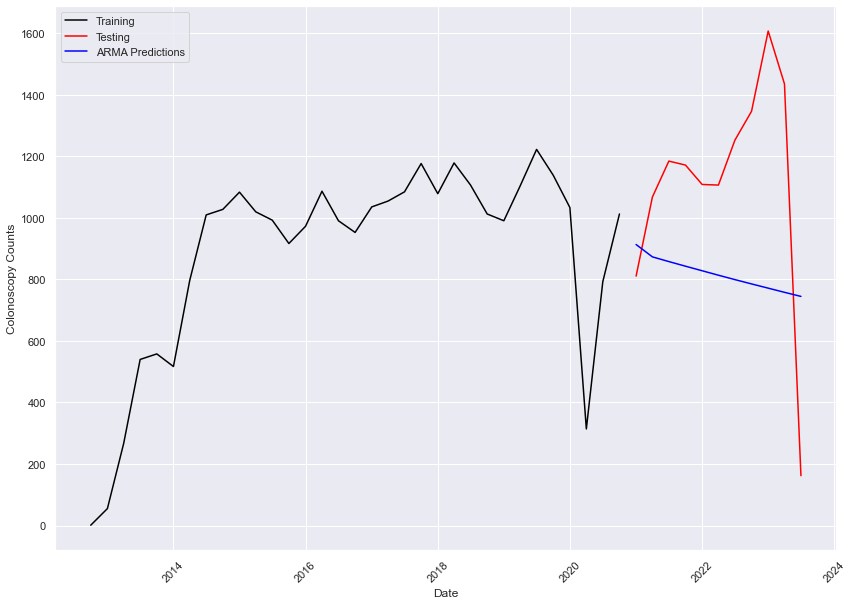

In [116]:
#ARMA modelsince there is no seasonality or trend
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['ID']

ARMAmodel = SARIMAX(y, order = (1, 0, 2))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Colonoscopy Counts')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title="Train test and Predictions for Colonoscopy Counts"
plt.plot(y_pred_outARMA, color='blue', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [117]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [118]:
df_timeseries

,Age,Gender,ID
Quarterdate,,,
2012-10-01,67,M,1
2013-01-01,67,F,3
2013-01-01,67,M,1
2013-01-01,68,F,7
2013-01-01,68,M,5
...,...,...,...
2023-07-01,75,F,1
2023-07-01,75,M,4
2023-07-01,76,M,1


In [119]:
#df_timeseriesQE=df_timeseries.copy()
#df_timeseriesQE=pd.DataFrame(df_timeseriesQE).reset_index()
#df_timeseriesQE

In [120]:
#df_timeseriesQE=df_timeseriesQE.set_index(pd.to_datetime(df_timeseriesQE['Quarterdate']))
#df_timeseriesQE

In [121]:

#train = df_timeseries[(df_timeseries.index < pd.to_datetime("2022-01-01", format='%Y-%m-%d')) ]
#test = df_timeseries[df_timeseries.index >= pd.to_datetime("2022-01-01", format='%Y-%m-%d')]

#print(train.shape)
#print(test.shape)
#train

In [122]:
#print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
#print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

In [123]:
#test[['Age','Gender']]

In [124]:
#train['Gender'] = train['Gender'].map(gendermap)
#test.info()

In [125]:
#test['Gender'] = test['Gender'].map(gendermap)
#train

In [126]:
df_timeseriesQD = dfcolraw.groupby(['Quarterdate'])['ID'].count()
df_timeseriesQD=pd.DataFrame(df_timeseriesQD).reset_index()
df_timeseriesQD=df_timeseriesQD.set_index(pd.to_datetime(df_timeseriesQD['Quarterdate']))
#df_timeseriesQD=df_timeseriesQD[['ID']]
df_timeseriesQD = df_timeseriesQD.asfreq('Q','ffill')

df_timeseriesQD.head(2)

,Quarterdate,ID
Quarterdate,,
2012-12-31,2012-10-01,1
2013-03-31,2013-01-01,55


In [127]:
dfcolraw.groupby(['Weekdate'])['ID'].count()

Weekdate
2012-12-03      1
2013-02-18      3
2013-02-25      4
2013-03-04     11
2013-03-11     12
             ... 
2023-06-12    104
2023-06-19    107
2023-06-26    129
2023-07-03    100
2023-07-10     42
Name: ID, Length: 541, dtype: int64

In [128]:
df_timeseriesWD = dfcolraw.groupby(['Weekdate'])['ID'].count()
df_timeseriesWD=pd.DataFrame(df_timeseriesWD).reset_index()
df_timeseriesWD=df_timeseriesWD.set_index(pd.to_datetime(df_timeseriesWD['Weekdate']))

df_timeseriesWD = df_timeseriesWD.asfreq('W','ffill')
df_timeseriesWD.head(2)

,Weekdate,ID
Weekdate,,
2012-12-09,2012-12-03,1
2012-12-16,2012-12-03,1


In [129]:
train = df_timeseriesQD[(df_timeseriesQD.index < pd.to_datetime("2021-01-01", format='%Y-%m-%d')) ]
test = df_timeseriesQD[df_timeseriesQD.index >= pd.to_datetime("2021-01-01", format='%Y-%m-%d')]

print(train.shape)
print(test.shape)
train

(33, 2)
(10, 2)


,Quarterdate,ID
Quarterdate,,
2012-12-31,2012-10-01,1
2013-03-31,2013-01-01,55
2013-06-30,2013-04-01,267
2013-09-30,2013-07-01,540
2013-12-31,2013-10-01,558
2014-03-31,2014-01-01,517
2014-06-30,2014-04-01,797
2014-09-30,2014-07-01,1010
2014-12-31,2014-10-01,1028


In [130]:
# Create and train forecaster for Quarter
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 2
                )

forecaster.fit(y=train['ID'])
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=10)
predictions.head(50)


2021-03-31    1043.14
2021-06-30    1047.56
2021-09-30    1056.76
2021-12-31    1090.76
2022-03-31    1120.95
2022-06-30    1116.93
2022-09-30    1117.82
2022-12-31    1117.82
2023-03-31    1117.82
2023-06-30    1117.82
Freq: Q-DEC, Name: pred, dtype: float64

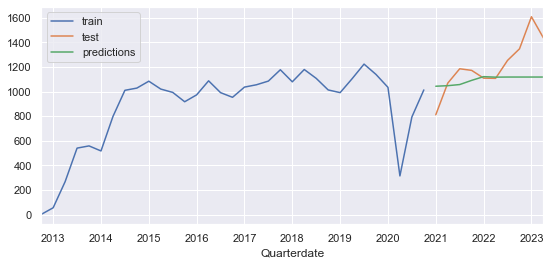

In [131]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
train['ID'].plot(ax=ax, label='train')
test['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [132]:
# Create and train forecaster for week
# ==============================================================================
#forecaster = ForecasterAutoreg(
#                regressor = RandomForestRegressor(random_state=123),
#                lags = 2
#                )
#
#forecaster.fit(y=trainw['ID'])
#forecaster
## Predictions
## ==============================================================================
#predictions = forecaster.predict(steps=132)
#predictions.head(50)


In [133]:
trainw = df_timeseriesWD[(df_timeseriesWD.index < pd.to_datetime("2021-01-01", format='%Y-%m-%d')) ]
testw = df_timeseriesWD[df_timeseriesWD.index >= pd.to_datetime("2021-01-01", format='%Y-%m-%d')]

print(trainw.shape)
print(testw.shape)
trainw

(421, 2)
(132, 2)


,Weekdate,ID
Weekdate,,
2012-12-09,2012-12-03,1
2012-12-16,2012-12-03,1
2012-12-23,2012-12-03,1
2012-12-30,2012-12-03,1
2013-01-06,2012-12-03,1
...,...,...
2020-11-29,2020-11-23,91
2020-12-06,2020-11-30,88
2020-12-13,2020-12-07,83


In [134]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 2
                )

forecaster.fit(y=trainw['ID'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2] 
Transformer for y: None 
Transformer for exog: None 
Window size: 2 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2012-12-09 00:00:00'), Timestamp('2020-12-27 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-08-06 18:36:42 
Last fit date: 2023-08-06 18:36:42 
Skforecast version: 0.7.0 
Python version: 3.9.12 
Forecaster id: None 

In [135]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=132)
predictions.tail(10)

2023-05-07    72.607500
2023-05-14    96.135000
2023-05-21    91.290000
2023-05-28    72.514381
2023-06-04    75.675000
2023-06-11    56.950000
2023-06-18    67.770000
2023-06-25    81.690000
2023-07-02    81.372500
2023-07-09    78.562000
Freq: W-SUN, Name: pred, dtype: float64

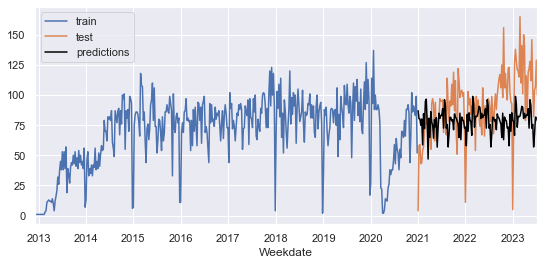

In [136]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
trainw['ID'].plot(ax=ax, label='train')
testw['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [137]:
testw.shape

(132, 2)

In [138]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testw['ID'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 949.7845006292001


In [139]:
train.shape

(33, 2)

In [140]:
# Hyperparameter Grid search
# ==============================================================================
steps = 36
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [40,50]
  
# Regressor's hyperparameters
param_grid = {'n_estimators': [500,1000],
              'max_depth': [100,200]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = trainw['ID'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(trainw)*0.8),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 8.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [02:49<00:00, 84.96s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40] 
  Parameters: {'max_depth': 100, 'n_estimators': 1000}
  Backtesting metric: 1046.0398746



In [141]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 1000}",1046.039875,100,1000
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 1000}",1046.039875,200,1000
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 500}",1047.237623,100,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 500}",1047.237623,200,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 1000}",1064.670468,100,1000
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 1000}",1064.670468,200,1000
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 500}",1074.418222,100,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 500}",1074.418222,200,500


In [142]:
# Predictors importance
# ==============================================================================
forecaster.get_feature_importance()

,feature,importance
0,lag_1,0.346723
1,lag_2,0.048197
2,lag_3,0.028705
3,lag_4,0.060103
4,lag_5,0.012894
5,lag_6,0.023928
6,lag_7,0.010104
7,lag_8,0.043124
8,lag_9,0.016410
9,lag_10,0.030326


In [143]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
    
                    regressor = make_pipeline(StandardScaler(),  LinearRegression()),
                    #regressor = LinearRegression(),
                    lags = 15
             )

forecaster.fit(y=trainw['ID'])

# Prediction intervals
# ==============================================================================
predictions = forecaster.predict_interval(
                    steps    = 132,
                    interval = [10, 70],
                    n_boot   = 100
              )

predictions.shape

(132, 3)

Test error (mse): 976.240785831682


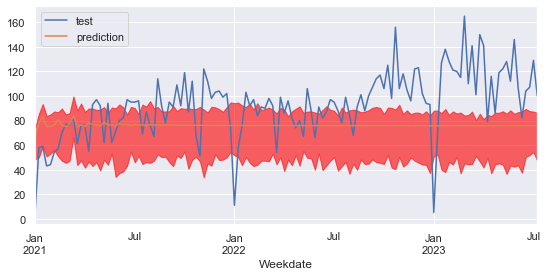

In [144]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testw['ID'],
                y_pred = predictions.iloc[:, 0]
            )

print(f"Test error (mse): {error_mse}")

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
testw['ID'].plot(ax=ax, label='test')
predictions['pred'].plot(ax=ax, label='prediction')
ax.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color = 'red',
    alpha = 0.6
)
ax.legend();

In [145]:
# Hyperparameter Grid search
# ==============================================================================
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput

forecaster = ForecasterAutoreg(
                    regressor = make_pipeline(StandardScaler(), Lasso(random_state=123)),
                    
                    lags      = 8 # This value will be replaced in the grid search
             )

# To access parameters of a scikitlearn pipeline the pattern:
# <name of the step>__<name of the parameter>.
param_grid = {'lasso__alpha': np.logspace(-5, 5, 10)}
lags_grid = [20, 30, 40,60]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = trainw['ID'],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 80,
                        refit       = True,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(trainw)*0.2),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
                )

Number of models compared: 40.


loop lags_grid: 100%|███████████████████████████████████████| 4/4 [00:03<00:00,  1.05it/s]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60] 
  Parameters: {'lasso__alpha': 3.593813663804626}
  Backtesting metric: 562.0726552409083



In [146]:
# Grid Search results
# ==============================================================================
results_grid.head()

,lags,params,mean_squared_error,lasso__alpha
35,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 3.593813663804626},562.072655,3.593814
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 0.2782559402207126},563.629741,0.278256
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 0.021544346900318846},565.655359,0.021544
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 0.0016681005372000592},566.272917,0.001668
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 0.0001291549665014884},566.329022,0.000129


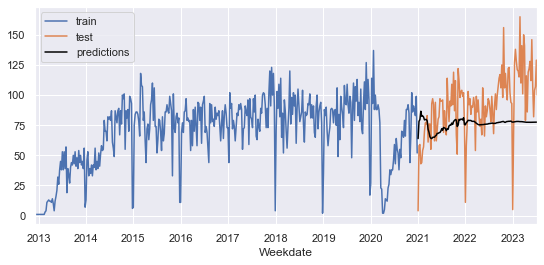

In [147]:
# Predictions
# ==============================================================================
predictions = forecaster.predict( steps    = 132)

# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
trainw['ID'].plot(ax=ax, label='train')
testw['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [148]:
dfcensus5569

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,273.536900
1,56,M,29475.000000,268.222500
2,57,M,28880.333333,262.811033
3,58,M,28045.833333,255.217083
4,59,M,27271.166667,248.167617
5,60,M,26555.166667,241.652017
6,61,M,25772.500000,234.529750
7,62,M,25068.833333,228.126383
8,63,M,24299.833333,221.128483
9,64,M,23751.500000,216.138650


In [149]:
dfcensus5569['Projectedcol'].sum()

5653.571383333333

In [150]:
dfcensus_ml=dfcensus5569.loc[(dfcensus5569['Age']>=55) & (dfcensus5569['Age']<71)]
dfcensus_ml

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,273.536900
1,56,M,29475.000000,268.222500
2,57,M,28880.333333,262.811033
3,58,M,28045.833333,255.217083
4,59,M,27271.166667,248.167617
5,60,M,26555.166667,241.652017
6,61,M,25772.500000,234.529750
7,62,M,25068.833333,228.126383
8,63,M,24299.833333,221.128483
9,64,M,23751.500000,216.138650


In [151]:
df_timeseriesml =dflspivotlt69[['Age','Gender','mean']].reset_index(drop=True)
dflspivotlt69

year,Gender,Age,2016,2017,2018,2019,2020,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,135.0,168.0,252.0,238.000000
2,F,60,105.0,278.0,243.0,217.0,84.0,129.0,185.0,176.000000
3,F,61,238.0,101.0,52.0,33.0,29.0,43.0,99.0,82.666667
27,M,61,366.0,160.0,113.0,64.0,47.0,73.0,149.0,137.166667
28,M,62,216.0,141.0,137.0,313.0,128.0,137.0,150.0,178.666667
4,F,62,149.0,96.0,137.0,228.0,85.0,93.0,95.0,131.333333
29,M,63,352.0,144.0,263.0,191.0,116.0,170.0,208.0,206.000000
5,F,63,256.0,91.0,196.0,152.0,60.0,128.0,178.0,147.166667
30,M,64,198.0,119.0,232.0,181.0,107.0,278.0,230.0,185.833333
6,F,64,126.0,83.0,135.0,121.0,78.0,152.0,160.0,115.833333


In [152]:
dfml = pd.merge(dfcensus_ml, df_timeseriesml, 'left',on=["Age", "Gender"])
dfml['Gender'] = dfml['Gender'].map(gendermap)

dfml

,Age,Gender,meanE,Projectedcol,mean
0,55,1,30059.000000,273.536900,NaN
1,56,1,29475.000000,268.222500,NaN
2,57,1,28880.333333,262.811033,NaN
3,58,1,28045.833333,255.217083,NaN
4,59,1,27271.166667,248.167617,NaN
5,60,1,26555.166667,241.652017,238.000000
6,61,1,25772.500000,234.529750,137.166667
7,62,1,25068.833333,228.126383,178.666667
8,63,1,24299.833333,221.128483,206.000000
9,64,1,23751.500000,216.138650,185.833333


In [153]:
dfml['mean'] = dfml['mean'].fillna(dfml['Projectedcol'])

In [154]:
dfml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           30 non-null     int64  
 1   Gender        30 non-null     int64  
 2   meanE         30 non-null     float64
 3   Projectedcol  30 non-null     float64
 4   mean          30 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.4 KB


In [155]:
dfcolpdavg=dfcolraw.groupby(['Age','Gender','CLINICID','month','year'])['ID'].count()

#dfcolpdavg=dfcolraw.groupby(['Age','proceduredate'])['ID'].count()
dfcolpdavg=pd.DataFrame(dfcolpdavg)
dfcolpdavg.reset_index(inplace=True)
dfcolpdavg['Gender'] = dfcolpdavg['Gender'].map(gendermap)

dfcolpdavg

,Age,Gender,CLINICID,month,year,ID
0,53,1,9,7,2018,1
1,57,2,24,4,2015,1
2,58,1,9,2,2018,1
3,59,2,2,3,2017,1
4,59,2,18,9,2018,1
...,...,...,...,...,...,...
21081,79,1,24,6,2023,1
21082,80,2,8,12,2022,1
21083,80,1,13,7,2023,1
21084,80,1,17,3,2023,1


In [156]:
#X = dfcolpdavg[['Age','Gender','meanE','Projectedcol']].values
dfcolpdavg

,Age,Gender,CLINICID,month,year,ID
0,53,1,9,7,2018,1
1,57,2,24,4,2015,1
2,58,1,9,2,2018,1
3,59,2,2,3,2017,1
4,59,2,18,9,2018,1
...,...,...,...,...,...,...
21081,79,1,24,6,2023,1
21082,80,2,8,12,2022,1
21083,80,1,13,7,2023,1
21084,80,1,17,3,2023,1


In [157]:
#Import Libraries for ML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [158]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
dfml['mean_l1'] = dfml ['mean'].shift(1)
dfml['mean_l2'] = dfml ['mean'].shift(2)
dfml['mean_l3'] = dfml ['mean'].shift(3)
dfml['mean_l4'] = dfml ['mean'].shift(4)
dfml['mean_l5'] = dfml ['mean'].shift(5)

# Display the first 10 records


dfml.bfill(axis = 0,inplace=True)

In [159]:
dfml

,Age,Gender,meanE,Projectedcol,mean,mean_l1,mean_l2,mean_l3,mean_l4,mean_l5
0,55,1,30059.000000,273.536900,273.536900,273.536900,273.536900,273.536900,273.536900,273.536900
1,56,1,29475.000000,268.222500,268.222500,273.536900,273.536900,273.536900,273.536900,273.536900
2,57,1,28880.333333,262.811033,262.811033,268.222500,273.536900,273.536900,273.536900,273.536900
3,58,1,28045.833333,255.217083,255.217083,262.811033,268.222500,273.536900,273.536900,273.536900
4,59,1,27271.166667,248.167617,248.167617,255.217083,262.811033,268.222500,273.536900,273.536900
5,60,1,26555.166667,241.652017,238.000000,248.167617,255.217083,262.811033,268.222500,273.536900
6,61,1,25772.500000,234.529750,137.166667,238.000000,248.167617,255.217083,262.811033,268.222500
7,62,1,25068.833333,228.126383,178.666667,137.166667,238.000000,248.167617,255.217083,262.811033
8,63,1,24299.833333,221.128483,206.000000,178.666667,137.166667,238.000000,248.167617,255.217083
9,64,1,23751.500000,216.138650,185.833333,206.000000,178.666667,137.166667,238.000000,248.167617


<AxesSubplot:>

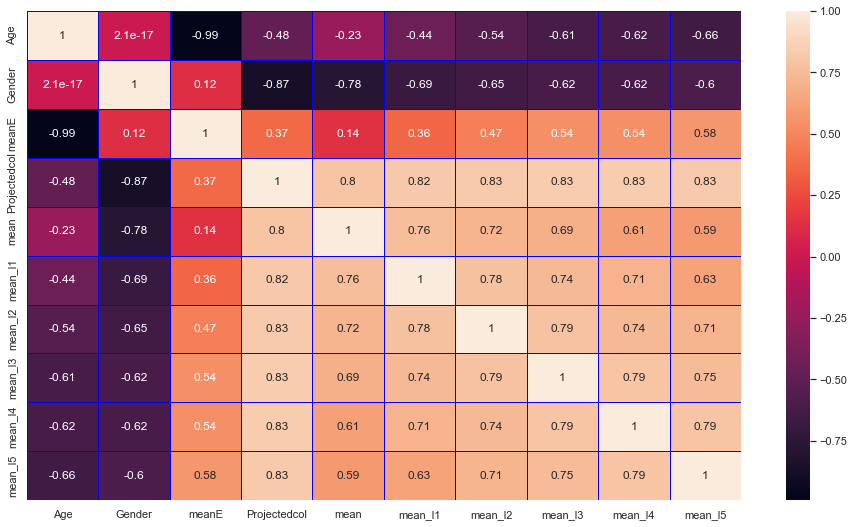

In [160]:
correlation = dfml.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

Training data Accuracy :  0.6015456733327128
Testing data  Accuracy :  -30.702321830834855


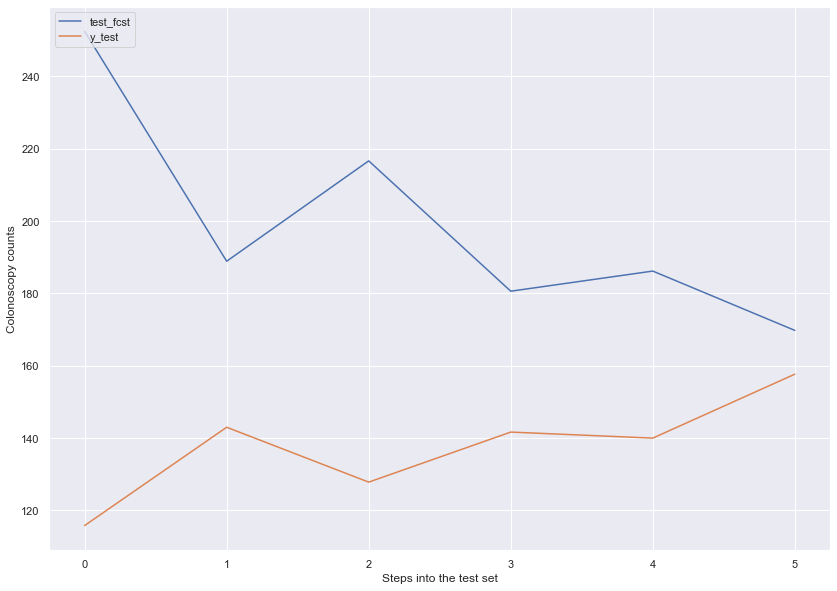

In [161]:


# Create X and y objects
X = dfml[['Projectedcol','mean_l1']].values
y = dfml['mean'].values

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345, shuffle = False)


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [162]:
X_train

array([[ 1.73152567,  1.37442455],
       [ 1.60096197,  1.37442455],
       [ 1.46801354,  1.26885916],
       [ 1.28144606,  1.16136565],
       [ 1.10825539,  1.01051922],
       [ 0.94818071,  0.87048843],
       [ 0.7732015 ,  0.66851862],
       [ 0.61588416, -1.33443738],
       [ 0.44396038, -0.51008028],
       [ 0.3213706 ,  0.03286978],
       [ 0.17702021, -0.36772142],
       [ 0.01117002,  0.40366494],
       [-0.13019947, -0.03003297],
       [-0.29809902,  0.41359695],
       [-0.4474797 ,  0.5228491 ],
       [-0.68655495,  1.16180861],
       [-0.74973502, -0.58067935],
       [-0.82862258, -0.63176267],
       [-0.95586961, -0.69554606],
       [-1.06208775, -0.7984298 ],
       [-1.17451419, -0.88431092],
       [-1.2772314 , -0.56305102],
       [-1.37833818, -2.41702682],
       [-1.49225835, -1.45031086]])

# Cross Validation

# GRID SEARCH CV

In [163]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [164]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

0.617383246521383
0.4589427232976717


0.617383246521383
0.4589427232976717


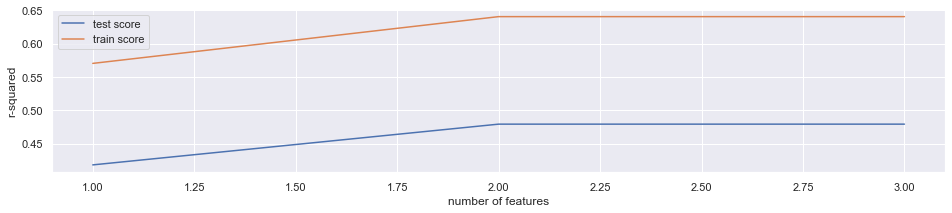

In [165]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# K Neighbours Regressor

In [166]:
from sklearn.neighbors import KNeighborsRegressor

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)





neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Declare and initialise kNN classifier with k neighbors
    kNR = KNeighborsRegressor(n_neighbors = k)
    
    #Call the method fit to train the model
    kNR.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i]=kNR.score(X_train,y_train)
    
    #Compute accuracy on the training set
    test_accuracy[i]=kNR.score(X_test,y_test)
    
    
knr_train_acc=train_accuracy.mean()
knr_test_acc=test_accuracy.mean()
print(knr_train_acc)
print(knr_test_acc)

0.4111486023487696
-7.192437224116388


# Decision Tree Regressor

In [167]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor



tree = DecisionTreeRegressor(max_depth = 4)
tree.fit(X_train, y_train)

# Return a copy of the array collapsed into one dimension.
sort_idx = X.flatten().argsort()
len(sort_idx)
#lin_regplot(X[sort_idx], y[sort_idx], tree)
# plt.xlabel('% lower status of the population [LSTAT]')
# plt.ylabel('Price in $1000\'s [MEDV]')
# # plt.savefig('./figures/tree_regression.png', dpi = 300)
# plt.show()

60

In [168]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

DT_R2_Train=r2_score(y_train, y_train_pred)
DT_R2_Test=r2_score(y_test, y_test_pred)

R^2 train: 0.974, test: -4.346


In [169]:
#print("Train Prediction : ",y_train_pred)
#print("Test Prediction : ",y_test_pred)
    #Compute accuracy on the training set
train_accuracy[i]=tree.score(X_train,y_train)
    
    #Compute accuracy on the training set
test_accuracy[i]=tree.score(X_test,y_test)

DT_Train_acc=train_accuracy.mean()
DT_Test_acc=test_accuracy.mean()
print(DT_Train_acc)
print(DT_Test_acc)


0.45654972345457373
-6.787627948283664


# GRID CV

In [170]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [171]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,5,1,0.999822,-0.030837
1,4,2,1.000000,0.003098
2,2,3,1.000000,0.178166
3,3,4,1.000000,0.162448
4,1,5,1.000000,0.226566


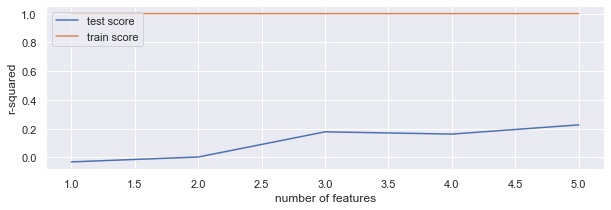

In [172]:
# plotting cv results
plt.figure(figsize=(10,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [173]:
#Random Forest Regressor

In [174]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor







# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)



RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=1)

In [175]:
# All the ML algorthims shows very small accruarcy.

In [176]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1,69,2013-03-19,M,19,1,3,2013,Mar,2013-01-01,2013-03-18,2013-03-01
1,2,69,2013-03-12,F,19,1,3,2013,Mar,2013-01-01,2013-03-11,2013-03-01
2,3,69,2013-03-05,F,19,1,3,2013,Mar,2013-01-01,2013-03-04,2013-03-01
3,4,69,2013-03-12,M,19,1,3,2013,Mar,2013-01-01,2013-03-11,2013-03-01
4,5,69,2013-03-12,M,19,1,3,2013,Mar,2013-01-01,2013-03-11,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,1,6,2023,June,2023-04-01,2023-06-26,2023-06-01
41387,41388,62,2023-07-12,F,18,1,7,2023,July,2023-07-01,2023-07-10,2023-07-01
41388,41389,62,2023-07-12,M,13,1,7,2023,July,2023-07-01,2023-07-10,2023-07-01
41389,41390,80,2023-07-12,M,13,1,7,2023,July,2023-07-01,2023-07-10,2023-07-01


In [177]:
#dfml = pd.merge(dfcensus_ml, df_timeseriesml, 'left',on=["Age", "Gender"])
#dfml['Gender'] = dfml['Gender'].map(gendermap)

dfcensus_ml.describe()

,Age,meanE,Projectedcol
count,30.000000,30.000000,30.000000
mean,62.000000,25552.516667,188.452379
std,4.394354,3112.312153,47.564118
min,55.000000,20312.500000,120.629100
25%,58.250000,23109.041667,147.983400
50%,62.000000,25420.666667,179.978150
75%,65.750000,28044.333333,226.376908
max,69.000000,30721.500000,273.536900


In [178]:
#Yearly average above is 188. Daily average is 188/52(weeks)=3.6 (4). Will add this to the weekly numbers from the colonoscopy records

In [179]:
df_timeseriesWD

,Weekdate,ID
Weekdate,,
2012-12-09,2012-12-03,1
2012-12-16,2012-12-03,1
2012-12-23,2012-12-03,1
2012-12-30,2012-12-03,1
2013-01-06,2012-12-03,1
...,...,...
2023-06-11,2023-06-05,82
2023-06-18,2023-06-12,104
2023-06-25,2023-06-19,107


In [180]:
df_timeseriesWD['ID']=df_timeseriesWD['ID']+4

In [181]:
df_timeseriesWD.reset_index(drop=True,inplace=True)
df_timeseriesWD.rename(columns = {'ID':'Counts'}, inplace = True)
df_timeseriesWD

,Weekdate,Counts
0,2012-12-03,5
1,2012-12-03,5
2,2012-12-03,5
3,2012-12-03,5
4,2012-12-03,5
...,...,...
548,2023-06-05,86
549,2023-06-12,108
550,2023-06-19,111
551,2023-06-26,133


In [182]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
df_timeseriesWD['Counts_l1'] = df_timeseriesWD ['Counts'].shift(1)
df_timeseriesWD['Counts_l2'] = df_timeseriesWD ['Counts'].shift(2)
df_timeseriesWD['Counts_l3'] = df_timeseriesWD ['Counts'].shift(3)
df_timeseriesWD['Counts_l4'] = df_timeseriesWD ['Counts'].shift(4)
df_timeseriesWD['Counts_l5'] = df_timeseriesWD ['Counts'].shift(5)
df_timeseriesWD

,Weekdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2012-12-03,5,NaN,NaN,NaN,NaN,NaN
1,2012-12-03,5,5.0,NaN,NaN,NaN,NaN
2,2012-12-03,5,5.0,5.0,NaN,NaN,NaN
3,2012-12-03,5,5.0,5.0,5.0,NaN,NaN
4,2012-12-03,5,5.0,5.0,5.0,5.0,NaN
...,...,...,...,...,...,...,...
548,2023-06-05,86,111.0,150.0,116.0,132.0,126.0
549,2023-06-12,108,86.0,111.0,150.0,116.0,132.0
550,2023-06-19,111,108.0,86.0,111.0,150.0,116.0
551,2023-06-26,133,111.0,108.0,86.0,111.0,150.0


In [183]:
df_timeseriesWD.bfill(axis = 0,inplace=True)
df_timeseriesWD

,Weekdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2012-12-03,5,5.0,5.0,5.0,5.0,5.0
1,2012-12-03,5,5.0,5.0,5.0,5.0,5.0
2,2012-12-03,5,5.0,5.0,5.0,5.0,5.0
3,2012-12-03,5,5.0,5.0,5.0,5.0,5.0
4,2012-12-03,5,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...
548,2023-06-05,86,111.0,150.0,116.0,132.0,126.0
549,2023-06-12,108,86.0,111.0,150.0,116.0,132.0
550,2023-06-19,111,108.0,86.0,111.0,150.0,116.0
551,2023-06-26,133,111.0,108.0,86.0,111.0,150.0


In [184]:
#Quarter df

df_timeseriesQD
df_timeseriesQD['ID']=df_timeseriesQD['ID']+(188/4)
df_timeseriesQD=df_timeseriesQD.reset_index(drop=True)
df_timeseriesQD=df_timeseriesQD.rename(columns = {'ID':'Counts'})
df_timeseriesQD['Counts_l1'] = df_timeseriesQD ['Counts'].shift(1)
df_timeseriesQD['Counts_l2'] = df_timeseriesQD ['Counts'].shift(2)
df_timeseriesQD['Counts_l3'] = df_timeseriesQD ['Counts'].shift(3)
df_timeseriesQD['Counts_l4'] = df_timeseriesQD ['Counts'].shift(4)
df_timeseriesQD['Counts_l5'] = df_timeseriesQD ['Counts'].shift(5)

df_timeseriesQD

,Quarterdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2012-10-01,48.0,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,102.0,48.0,NaN,NaN,NaN,NaN
2,2013-04-01,314.0,102.0,48.0,NaN,NaN,NaN
3,2013-07-01,587.0,314.0,102.0,48.0,NaN,NaN
4,2013-10-01,605.0,587.0,314.0,102.0,48.0,NaN
5,2014-01-01,564.0,605.0,587.0,314.0,102.0,48.0
6,2014-04-01,844.0,564.0,605.0,587.0,314.0,102.0
7,2014-07-01,1057.0,844.0,564.0,605.0,587.0,314.0
8,2014-10-01,1075.0,1057.0,844.0,564.0,605.0,587.0
9,2015-01-01,1131.0,1075.0,1057.0,844.0,564.0,605.0


In [185]:
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1,69,2013-03-19,M,19,1,3,2013,Mar,2013-01-01,2013-03-18,2013-03-01
1,2,69,2013-03-12,F,19,1,3,2013,Mar,2013-01-01,2013-03-11,2013-03-01
2,3,69,2013-03-05,F,19,1,3,2013,Mar,2013-01-01,2013-03-04,2013-03-01
3,4,69,2013-03-12,M,19,1,3,2013,Mar,2013-01-01,2013-03-11,2013-03-01
4,5,69,2013-03-12,M,19,1,3,2013,Mar,2013-01-01,2013-03-11,2013-03-01


In [186]:
df_timeseriesMD = dfcolraw.groupby(['Monthdate'])['ID'].count()
df_timeseriesMD=pd.DataFrame(df_timeseriesMD).reset_index()
df_timeseriesMD=df_timeseriesMD.set_index(pd.to_datetime(df_timeseriesMD['Monthdate']))
#df_timeseriesQD=df_timeseriesQD[['ID']]
df_timeseriesMD = df_timeseriesMD.asfreq('M','ffill')

df_timeseriesMD.head(2)

,Monthdate,ID
Monthdate,,
2012-12-31,2012-12-01,1
2013-01-31,2012-12-01,1


In [187]:
##Month df

df_timeseriesMD
df_timeseriesMD=df_timeseriesMD.rename(columns = {'ID':'Counts'})
df_timeseriesMD['ID']=df_timeseriesMD['Counts']+(188/12)
df_timeseriesMD=df_timeseriesMD.reset_index(drop=True)
df_timeseriesMD['Counts_l1'] = df_timeseriesMD ['Counts'].shift(1)
df_timeseriesMD['Counts_l2'] = df_timeseriesMD ['Counts'].shift(2)
df_timeseriesMD['Counts_l3'] = df_timeseriesMD ['Counts'].shift(3)
df_timeseriesMD['Counts_l4'] = df_timeseriesMD ['Counts'].shift(4)
df_timeseriesMD['Counts_l5'] = df_timeseriesMD ['Counts'].shift(5)

df_timeseriesMD

,Monthdate,Counts,ID,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2012-12-01,1,16.666667,NaN,NaN,NaN,NaN,NaN
1,2012-12-01,1,16.666667,1.0,NaN,NaN,NaN,NaN
2,2013-02-01,4,19.666667,1.0,1.0,NaN,NaN,NaN
3,2013-03-01,51,66.666667,4.0,1.0,1.0,NaN,NaN
4,2013-04-01,38,53.666667,51.0,4.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...
122,2023-02-01,517,532.666667,514.0,344.0,514.0,489.0,465.0
123,2023-03-01,577,592.666667,517.0,514.0,344.0,514.0,489.0
124,2023-04-01,419,434.666667,577.0,517.0,514.0,344.0,514.0
125,2023-05-01,586,601.666667,419.0,577.0,517.0,514.0,344.0


In [188]:
df_timeseriesMD.bfill(axis = 0,inplace=True)


In [189]:
df_timeseriesQD.bfill(axis = 0,inplace=True)


<AxesSubplot:>

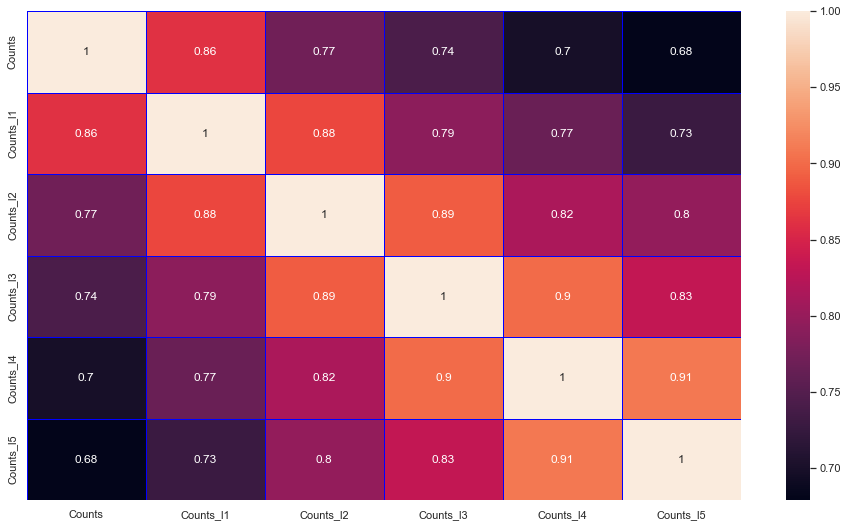

In [190]:
correlation = df_timeseriesQD.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [191]:
# Create X and y objects
X = df_timeseriesQD[['Counts_l1','Counts_l2','Counts_l3','Counts_l4']].values
y = df_timeseriesQD['Counts'].values

In [192]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


Training data Accuracy :  0.9240239093871379
Testing data  Accuracy :  -1.1743233195666751


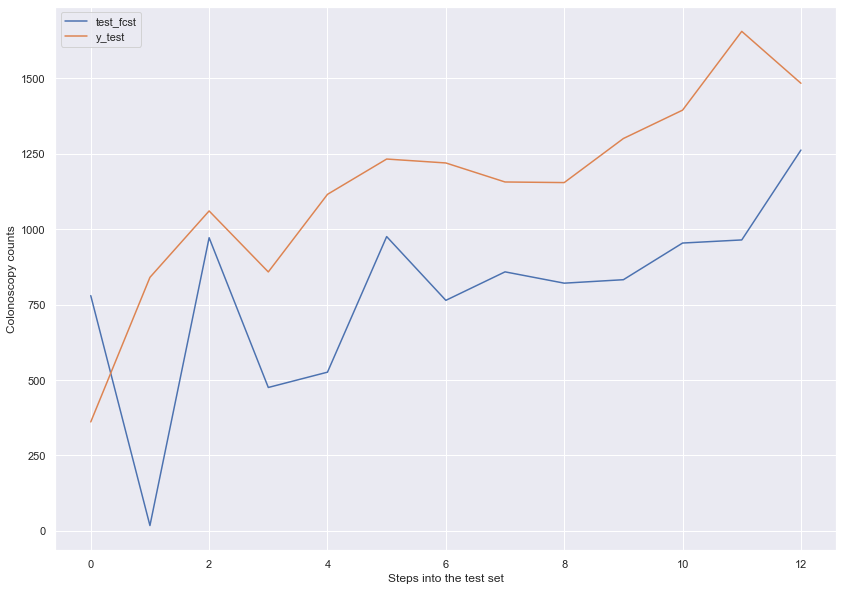

In [193]:


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [194]:
#CV

In [195]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=3)
scores.mean()

-0.4486245505664946

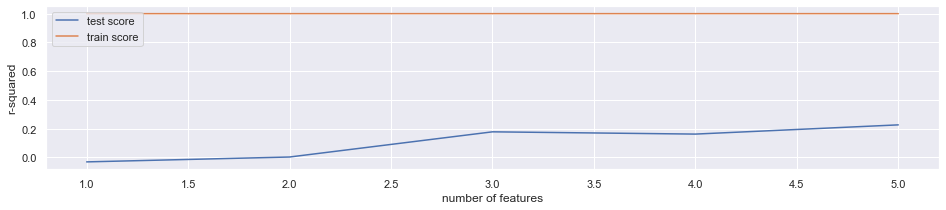

In [196]:
# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [197]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

0.0036442010948326

# GRIDCV

In [198]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

0.0036442010948326

In [199]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

0.9261085835405732
0.8775146412234531


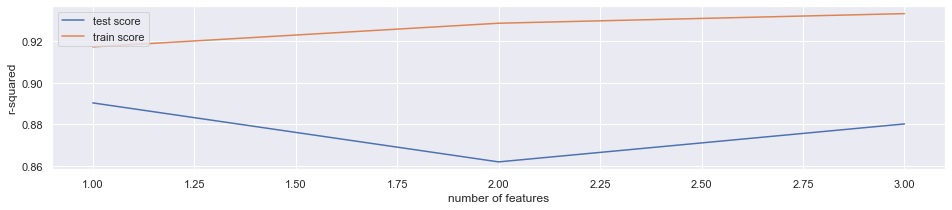

In [200]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

DT Regression

In [201]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1, shuffle = False)


In [202]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


#-----
#parameters = {
#    'n_estimators': [100, 150, 200, 250, 300],
#    'max_depth': [1,2,3,4],
#}
#regr = RandomForestRegressor(random_state=0)
#
#clf = GridSearchCV(regr, parameters)
#clf.fit(X_train, y_train)
#----

# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [203]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,5,1,0.968467,0.337027
1,4,2,0.980637,0.342002
2,3,3,0.999643,0.487283
3,1,4,0.999643,0.538668
4,2,5,0.999643,0.527412


In [204]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor


# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=1)

In [205]:
#Predictions
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
y_train_pred


array([ 119.40843571,  119.40843571,  256.7597    ,  465.1221    ,
        581.3825    ,  630.706     ,  864.348     , 1023.383     ,
       1041.763     , 1113.701     , 1108.646     , 1036.767     ,
       1006.999     , 1046.183     , 1106.381     , 1090.596     ,
       1023.037     , 1081.015     , 1115.423     , 1125.065     ,
       1183.695     , 1142.163     , 1175.14      , 1123.348     ,
       1108.595     , 1005.488     , 1100.298     , 1210.016     ,
       1175.127     , 1100.914     ,  652.055     ,  885.28      ,
       1022.098     ,  885.137     , 1086.018     , 1187.947     ,
       1187.71      , 1139.08      ])

In [206]:
# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R2_RF_train=r2_score(y_train, y_train_pred)
R2_RF_test=r2_score(y_test,y_test_pred)

R^2 train: 0.959, test: -6.299


In [207]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [208]:

y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


6701.474476073857

In [209]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


In [210]:
import lightgbm as lgb


In [211]:
model = lgb.LGBMRegressor(random_state=42,max_depth=100)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20)

[20]	training's l2: 998034	valid_0's l2: 666821
[40]	training's l2: 998034	valid_0's l2: 666821
[60]	training's l2: 998034	valid_0's l2: 666821
[80]	training's l2: 998034	valid_0's l2: 666821
[100]	training's l2: 998034	valid_0's l2: 666821


LGBMRegressor(max_depth=100, random_state=42)

In [212]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.0000
Testing accuracy -0.3812


In [213]:
#Yearly average above is 188. Daily average is 188/365=0.6. Will add this to the weekly numbers from the colonoscopy records

# Daily data

In [214]:
df_timeseriesD = dfcolraw.groupby(['proceduredate'])['ID'].count()


In [215]:
df_timeseriesD=pd.DataFrame(df_timeseriesD).reset_index()
df_timeseriesD=df_timeseriesD.set_index(pd.to_datetime(df_timeseriesD['proceduredate']))

df_timeseriesD = df_timeseriesD.asfreq('D','ffill')
df_timeseriesD = df_timeseriesD.sort_index()
df_timeseriesD=df_timeseriesD[['ID']]
df_timeseriesD.head(100)

,ID
proceduredate,
2012-12-03,1
2012-12-04,1
2012-12-05,1
2012-12-06,1
2012-12-07,1
...,...
2013-03-08,2
2013-03-09,2
2013-03-10,2


In [216]:
traind = df_timeseriesD[(df_timeseriesD.index < pd.to_datetime("2021-01-01", format='%Y-%m-%d')) ]
testd = df_timeseriesD[df_timeseriesD.index >= pd.to_datetime("2020-12-31", format='%Y-%m-%d')]

print(traind.shape)
print(testd.shape)
testd.tail()

(2951, 1)
(924, 1)


,ID
proceduredate,
2023-07-08,9
2023-07-09,9
2023-07-10,23
2023-07-11,14
2023-07-12,5


In [217]:
# Create and train forecaster for Quarter
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 2
                )

forecaster.fit(y=traind['ID'])
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=924)
predictions.tail(50)

2023-05-25    15.309627
2023-05-26    16.214263
2023-05-27    14.269527
2023-05-28    14.454440
2023-05-29    15.978099
2023-05-30    15.309627
2023-05-31    16.214263
2023-06-01    14.269527
2023-06-02    14.454440
2023-06-03    15.978099
2023-06-04    15.309627
2023-06-05    16.214263
2023-06-06    14.269527
2023-06-07    14.454440
2023-06-08    15.978099
2023-06-09    15.309627
2023-06-10    16.214263
2023-06-11    14.269527
2023-06-12    14.454440
2023-06-13    15.978099
2023-06-14    15.309627
2023-06-15    16.214263
2023-06-16    14.269527
2023-06-17    14.454440
2023-06-18    15.978099
2023-06-19    15.309627
2023-06-20    16.214263
2023-06-21    14.269527
2023-06-22    14.454440
2023-06-23    15.978099
2023-06-24    15.309627
2023-06-25    16.214263
2023-06-26    14.269527
2023-06-27    14.454440
2023-06-28    15.978099
2023-06-29    15.309627
2023-06-30    16.214263
2023-07-01    14.269527
2023-07-02    14.454440
2023-07-03    15.978099
2023-07-04    15.309627
2023-07-05    16

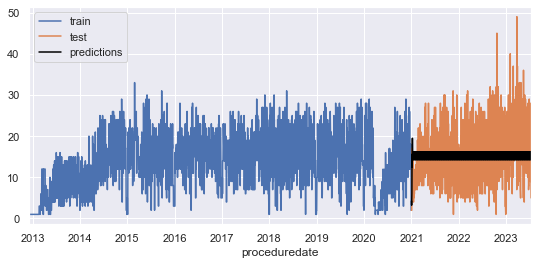

In [218]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
traind['ID'].plot(ax=ax, label='train')
testd['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [219]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testd['ID'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 55.82254201438649


In [220]:
df_daily = dfcolraw.groupby(['proceduredate','Age','Gender'])['ID'].count()
df_daily=pd.DataFrame(df_daily)
df_daily.reset_index(inplace=True)
df_daily

,proceduredate,Age,Gender,ID
0,2012-12-03,67,M,1
1,2013-02-20,69,M,2
2,2013-02-20,70,M,1
3,2013-02-25,69,M,1
4,2013-03-01,69,M,1
...,...,...,...,...
27955,2023-07-12,60,M,1
27956,2023-07-12,62,F,1
27957,2023-07-12,62,M,1
27958,2023-07-12,67,M,1


In [221]:
#Yearly average above is 188. Daily average is 188/365=0.6. Will add this to the daily numbers from the colonoscopy records
df_timeseriesPD=df_timeseriesD

df_timeseriesPD['ID']=df_timeseriesPD['ID']+1
df_timeseriesPD

,ID
proceduredate,
2012-12-03,2
2012-12-04,2
2012-12-05,2
2012-12-06,2
2012-12-07,2
...,...
2023-07-08,10
2023-07-09,10
2023-07-10,24


In [222]:
#df_timeseriesPD['Gender'] = df_timeseriesPD['Gender'].map(gendermap)


In [223]:
#df_timeseriesPD.reset_index(inplace=True)
df_timeseriesPD.rename(columns = {'ID':'Counts'}, inplace = True)
df_timeseriesPD

,Counts
proceduredate,
2012-12-03,2
2012-12-04,2
2012-12-05,2
2012-12-06,2
2012-12-07,2
...,...
2023-07-08,10
2023-07-09,10
2023-07-10,24


In [224]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
df_timeseriesPD['Counts_l1'] = df_timeseriesPD ['Counts'].shift(1)
df_timeseriesPD['Counts_l2'] = df_timeseriesPD ['Counts'].shift(2)
df_timeseriesPD['Counts_l3'] = df_timeseriesPD ['Counts'].shift(3)
df_timeseriesPD['Counts_l4'] = df_timeseriesPD ['Counts'].shift(4)
df_timeseriesPD['Counts_l5'] = df_timeseriesPD ['Counts'].shift(5)
df_timeseriesPD

,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
proceduredate,,,,,,
2012-12-03,2,NaN,NaN,NaN,NaN,NaN
2012-12-04,2,2.0,NaN,NaN,NaN,NaN
2012-12-05,2,2.0,2.0,NaN,NaN,NaN
2012-12-06,2,2.0,2.0,2.0,NaN,NaN
2012-12-07,2,2.0,2.0,2.0,2.0,NaN
...,...,...,...,...,...,...
2023-07-08,10,10.0,29.0,27.0,14.0,25.0
2023-07-09,10,10.0,10.0,29.0,27.0,14.0
2023-07-10,24,10.0,10.0,10.0,29.0,27.0


In [225]:
df_timeseriesPD.bfill(axis = 0,inplace=True)
df_timeseriesPD

,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
proceduredate,,,,,,
2012-12-03,2,2.0,2.0,2.0,2.0,2.0
2012-12-04,2,2.0,2.0,2.0,2.0,2.0
2012-12-05,2,2.0,2.0,2.0,2.0,2.0
2012-12-06,2,2.0,2.0,2.0,2.0,2.0
2012-12-07,2,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...
2023-07-08,10,10.0,29.0,27.0,14.0,25.0
2023-07-09,10,10.0,10.0,29.0,27.0,14.0
2023-07-10,24,10.0,10.0,10.0,29.0,27.0


<AxesSubplot:>

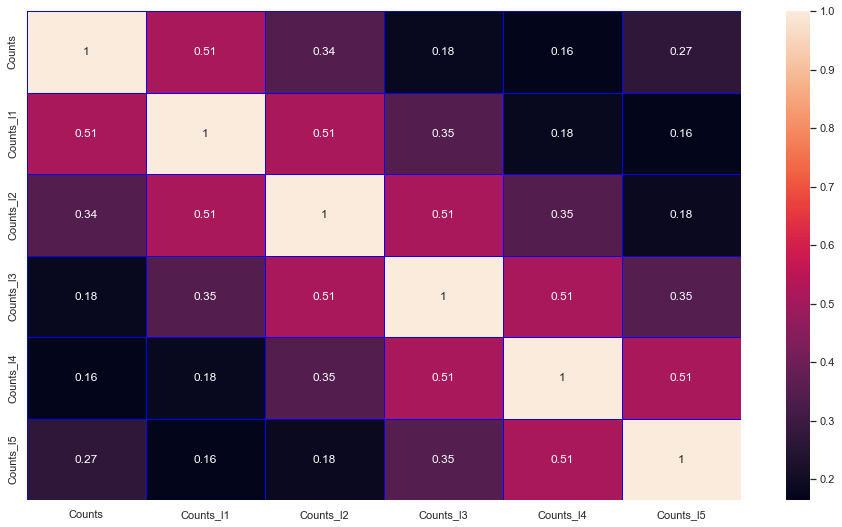

In [226]:
correlation = df_timeseriesPD.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [227]:
# Create X and y objects
X = df_timeseriesPD[['Counts_l1','Counts_l2']].values
y = df_timeseriesPD['Counts'].values

In [228]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


Training data Accuracy :  0.3462982843054401
Testing data  Accuracy :  0.09008077895473499


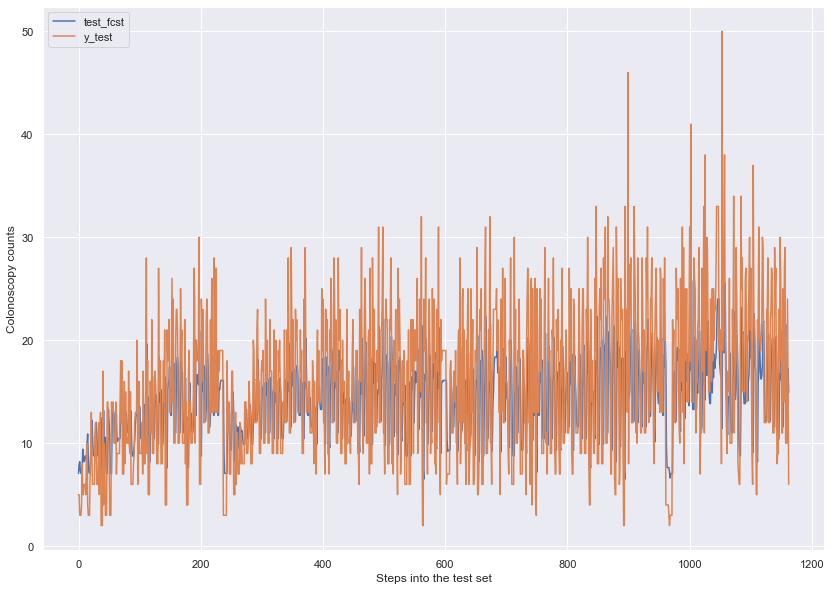

In [229]:


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [230]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=3)
scores.mean()

0.19471791991624068

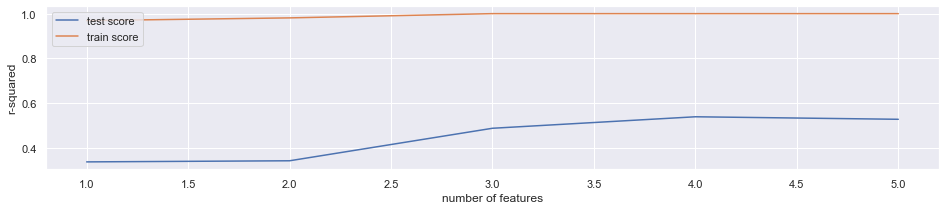

In [231]:
# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [232]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

0.22844589585804775

# GRID CV

In [233]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

0.3430974888098792
0.3406418097172417


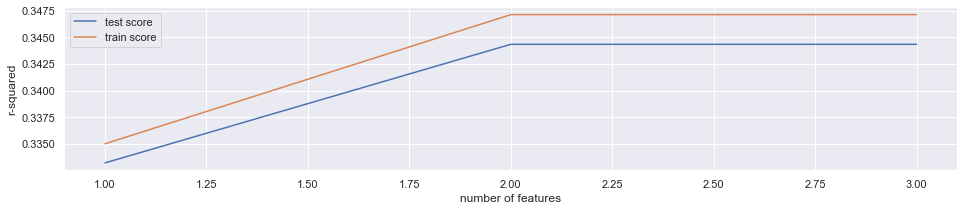

In [234]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Decision Tree

In [235]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


#-----
#parameters = {
#    'n_estimators': [100, 150, 200, 250, 300],
#    'max_depth': [1,2,3,4],
#}
#regr = RandomForestRegressor(random_state=0)
#
#clf = GridSearchCV(regr, parameters)
#clf.fit(X_train, y_train)
#----

# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [236]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,1,1,0.395485,0.379519
1,4,2,0.571583,0.233557
2,5,3,0.571583,0.233331
3,2,4,0.571583,0.235011
4,3,5,0.571583,0.233784


In [237]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor


# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=1)

In [238]:
#Predictions
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
y_train_pred


array([2.44958374, 2.44958374, 2.44958374, ..., 5.19936792, 5.19936792,
       5.19936792])

In [239]:
# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R2_RF_train=r2_score(y_train, y_train_pred)
R2_RF_test=r2_score(y_test,y_test_pred)

R^2 train: 0.532, test: 0.057


In [240]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [241]:
y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


25.875353393999657

In [242]:


parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)


In [243]:

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


25.875353393999657

# Booster Algorithm

In [244]:
model = lgb.LGBMRegressor(random_state=42,max_depth=100)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20)

[20]	training's l2: 24.9763	valid_0's l2: 47.7524
[40]	training's l2: 24.0097	valid_0's l2: 48.0993
[60]	training's l2: 23.6632	valid_0's l2: 48.3522
[80]	training's l2: 23.3974	valid_0's l2: 48.5154
[100]	training's l2: 23.1928	valid_0's l2: 48.8062


LGBMRegressor(max_depth=100, random_state=42)

In [245]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.4716
Testing accuracy 0.1186


# Network

In [397]:
# Create X and y objects
X = df_timeseriesWD[['Counts_l1','Counts_l2','Counts_l3','Counts_l4']].values
y = df_timeseriesWD['Counts'].values

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,  shuffle = False)


In [398]:
from keras import Sequential
from keras.layers import Dense
from keras import models

def build_regressor():
    regressor = models.Sequential()
    regressor.add(Dense(units=9, input_shape=(X_train.shape[1],),activation='relu'))
    regressor.add(Dense(units=4, activation='relu'))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mse','mae'])
    return regressor

In [413]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=1000,epochs=5000)

In [414]:
results=regressor.fit(X_train,y_train)

Epoch 1/5000
1/1 [==============================] - 1s 1s/step - loss: 26426.5859 - mse: 26426.5859 - mae: 153.7197
Epoch 2/5000
1/1 [==============================] - 0s 9ms/step - loss: 26081.5449 - mse: 26081.5449 - mae: 152.7044
Epoch 3/5000
1/1 [==============================] - 0s 7ms/step - loss: 25738.6406 - mse: 25738.6406 - mae: 151.6884
Epoch 4/5000
1/1 [==============================] - 0s 8ms/step - loss: 25397.1543 - mse: 25397.1543 - mae: 150.6698
Epoch 5/5000
1/1 [==============================] - 0s 8ms/step - loss: 25057.3438 - mse: 25057.3438 - mae: 149.6496
Epoch 6/5000
1/1 [==============================] - 0s 11ms/step - loss: 24719.2500 - mse: 24719.2500 - mae: 148.6279
Epoch 7/5000
1/1 [==============================] - 0s 6ms/step - loss: 24384.4102 - mse: 24384.4102 - mae: 147.6087
Epoch 8/5000
1/1 [==============================] - 0s 12ms/step - loss: 24051.5762 - mse: 24051.5762 - mae: 146.5880
Epoch 9/5000
1/1 [==============================] - 0s 12ms/ste

1/1 [==============================] - 0s 7ms/step - loss: 9350.1572 - mse: 9350.1572 - mae: 90.6573
Epoch 71/5000
1/1 [==============================] - 0s 11ms/step - loss: 9198.2939 - mse: 9198.2939 - mae: 89.8967
Epoch 72/5000
1/1 [==============================] - 0s 7ms/step - loss: 9048.6123 - mse: 9048.6123 - mae: 89.1404
Epoch 73/5000
1/1 [==============================] - 0s 8ms/step - loss: 8901.1611 - mse: 8901.1611 - mae: 88.3894
Epoch 74/5000
1/1 [==============================] - 0s 10ms/step - loss: 8756.3994 - mse: 8756.3994 - mae: 87.6461
Epoch 75/5000
1/1 [==============================] - 0s 7ms/step - loss: 8615.4229 - mse: 8615.4229 - mae: 86.9155
Epoch 76/5000
1/1 [==============================] - 0s 7ms/step - loss: 8480.6670 - mse: 8480.6670 - mae: 86.2125
Epoch 77/5000
1/1 [==============================] - 0s 7ms/step - loss: 8352.6172 - mse: 8352.6172 - mae: 85.5429
Epoch 78/5000
1/1 [==============================] - 0s 8ms/step - loss: 8236.1484 - mse: 82

1/1 [==============================] - 0s 10ms/step - loss: 6443.0312 - mse: 6443.0312 - mae: 74.6404
Epoch 141/5000
1/1 [==============================] - 0s 6ms/step - loss: 6430.2178 - mse: 6430.2178 - mae: 74.5549
Epoch 142/5000
1/1 [==============================] - 0s 9ms/step - loss: 6415.9858 - mse: 6415.9858 - mae: 74.4625
Epoch 143/5000
1/1 [==============================] - 0s 7ms/step - loss: 6400.3745 - mse: 6400.3745 - mae: 74.3622
Epoch 144/5000
1/1 [==============================] - 0s 9ms/step - loss: 6382.6001 - mse: 6382.6001 - mae: 74.2479
Epoch 145/5000
1/1 [==============================] - 0s 6ms/step - loss: 6362.4756 - mse: 6362.4756 - mae: 74.1164
Epoch 146/5000
1/1 [==============================] - 0s 6ms/step - loss: 6337.8535 - mse: 6337.8535 - mae: 73.9546
Epoch 147/5000
1/1 [==============================] - 0s 9ms/step - loss: 6308.4277 - mse: 6308.4277 - mae: 73.7600
Epoch 148/5000
1/1 [==============================] - 0s 6ms/step - loss: 6274.1504 - 

Epoch 211/5000
1/1 [==============================] - 0s 7ms/step - loss: 600.0897 - mse: 600.0897 - mae: 18.2013
Epoch 212/5000
1/1 [==============================] - 0s 6ms/step - loss: 591.5811 - mse: 591.5811 - mae: 17.9474
Epoch 213/5000
1/1 [==============================] - 0s 6ms/step - loss: 584.3223 - mse: 584.3223 - mae: 17.7213
Epoch 214/5000
1/1 [==============================] - 0s 7ms/step - loss: 578.1825 - mse: 578.1825 - mae: 17.5267
Epoch 215/5000
1/1 [==============================] - 0s 9ms/step - loss: 573.0380 - mse: 573.0380 - mae: 17.3611
Epoch 216/5000
1/1 [==============================] - 0s 6ms/step - loss: 568.7726 - mse: 568.7726 - mae: 17.2130
Epoch 217/5000
1/1 [==============================] - 0s 10ms/step - loss: 565.2778 - mse: 565.2778 - mae: 17.0819
Epoch 218/5000
1/1 [==============================] - 0s 7ms/step - loss: 562.4506 - mse: 562.4506 - mae: 16.9685
Epoch 219/5000
1/1 [==============================] - 0s 7ms/step - loss: 560.1989 - ms

1/1 [==============================] - 0s 8ms/step - loss: 540.9792 - mse: 540.9792 - mae: 16.3653
Epoch 283/5000
1/1 [==============================] - 0s 7ms/step - loss: 540.7410 - mse: 540.7410 - mae: 16.3623
Epoch 284/5000
1/1 [==============================] - 0s 7ms/step - loss: 540.5027 - mse: 540.5027 - mae: 16.3593
Epoch 285/5000
1/1 [==============================] - 0s 7ms/step - loss: 540.2646 - mse: 540.2646 - mae: 16.3561
Epoch 286/5000
1/1 [==============================] - 0s 12ms/step - loss: 540.0283 - mse: 540.0283 - mae: 16.3529
Epoch 287/5000
1/1 [==============================] - 0s 7ms/step - loss: 539.7933 - mse: 539.7933 - mae: 16.3497
Epoch 288/5000
1/1 [==============================] - 0s 7ms/step - loss: 539.5582 - mse: 539.5582 - mae: 16.3464
Epoch 289/5000
1/1 [==============================] - 0s 7ms/step - loss: 539.3220 - mse: 539.3220 - mae: 16.3430
Epoch 290/5000
1/1 [==============================] - 0s 6ms/step - loss: 539.0858 - mse: 539.0858 - m

1/1 [==============================] - 0s 8ms/step - loss: 522.8451 - mse: 522.8451 - mae: 16.0566
Epoch 354/5000
1/1 [==============================] - 0s 6ms/step - loss: 522.5599 - mse: 522.5599 - mae: 16.0516
Epoch 355/5000
1/1 [==============================] - 0s 8ms/step - loss: 522.2734 - mse: 522.2734 - mae: 16.0466
Epoch 356/5000
1/1 [==============================] - 0s 9ms/step - loss: 521.9860 - mse: 521.9860 - mae: 16.0415
Epoch 357/5000
1/1 [==============================] - 0s 7ms/step - loss: 521.6976 - mse: 521.6976 - mae: 16.0364
Epoch 358/5000
1/1 [==============================] - 0s 9ms/step - loss: 521.4089 - mse: 521.4089 - mae: 16.0313
Epoch 359/5000
1/1 [==============================] - 0s 6ms/step - loss: 521.1194 - mse: 521.1194 - mae: 16.0262
Epoch 360/5000
1/1 [==============================] - 0s 6ms/step - loss: 520.8314 - mse: 520.8314 - mae: 16.0212
Epoch 361/5000
1/1 [==============================] - 0s 9ms/step - loss: 520.5432 - mse: 520.5432 - ma

Epoch 425/5000
1/1 [==============================] - 0s 7ms/step - loss: 503.2397 - mse: 503.2397 - mae: 15.7164
Epoch 426/5000
1/1 [==============================] - 0s 7ms/step - loss: 502.9790 - mse: 502.9790 - mae: 15.7123
Epoch 427/5000
1/1 [==============================] - 0s 9ms/step - loss: 502.7183 - mse: 502.7183 - mae: 15.7083
Epoch 428/5000
1/1 [==============================] - 0s 7ms/step - loss: 502.4561 - mse: 502.4561 - mae: 15.7042
Epoch 429/5000
1/1 [==============================] - 0s 9ms/step - loss: 502.1927 - mse: 502.1927 - mae: 15.7000
Epoch 430/5000
1/1 [==============================] - 0s 10ms/step - loss: 501.9296 - mse: 501.9296 - mae: 15.6958
Epoch 431/5000
1/1 [==============================] - 0s 10ms/step - loss: 501.6668 - mse: 501.6668 - mae: 15.6917
Epoch 432/5000
1/1 [==============================] - 0s 6ms/step - loss: 501.4045 - mse: 501.4045 - mae: 15.6875
Epoch 433/5000
1/1 [==============================] - 0s 7ms/step - loss: 501.1427 - m

1/1 [==============================] - 0s 7ms/step - loss: 486.1739 - mse: 486.1739 - mae: 15.4305
Epoch 497/5000
1/1 [==============================] - 0s 9ms/step - loss: 485.9720 - mse: 485.9720 - mae: 15.4271
Epoch 498/5000
1/1 [==============================] - 0s 7ms/step - loss: 485.7710 - mse: 485.7710 - mae: 15.4237
Epoch 499/5000
1/1 [==============================] - 0s 7ms/step - loss: 485.5706 - mse: 485.5706 - mae: 15.4203
Epoch 500/5000
1/1 [==============================] - 0s 8ms/step - loss: 485.3710 - mse: 485.3710 - mae: 15.4170
Epoch 501/5000
1/1 [==============================] - 0s 8ms/step - loss: 485.1723 - mse: 485.1723 - mae: 15.4137
Epoch 502/5000
1/1 [==============================] - 0s 8ms/step - loss: 484.9742 - mse: 484.9742 - mae: 15.4104
Epoch 503/5000
1/1 [==============================] - 0s 7ms/step - loss: 484.7767 - mse: 484.7767 - mae: 15.4071
Epoch 504/5000
1/1 [==============================] - 0s 6ms/step - loss: 484.5797 - mse: 484.5797 - ma

Epoch 568/5000
1/1 [==============================] - 0s 6ms/step - loss: 472.7517 - mse: 472.7517 - mae: 15.2053
Epoch 569/5000
1/1 [==============================] - 0s 7ms/step - loss: 472.5720 - mse: 472.5720 - mae: 15.2023
Epoch 570/5000
1/1 [==============================] - 0s 8ms/step - loss: 472.3922 - mse: 472.3922 - mae: 15.1993
Epoch 571/5000
1/1 [==============================] - 0s 6ms/step - loss: 472.2120 - mse: 472.2120 - mae: 15.1962
Epoch 572/5000
1/1 [==============================] - 0s 9ms/step - loss: 472.0302 - mse: 472.0302 - mae: 15.1931
Epoch 573/5000
1/1 [==============================] - 0s 7ms/step - loss: 471.8481 - mse: 471.8481 - mae: 15.1900
Epoch 574/5000
1/1 [==============================] - 0s 9ms/step - loss: 471.6659 - mse: 471.6659 - mae: 15.1869
Epoch 575/5000
1/1 [==============================] - 0s 7ms/step - loss: 471.4828 - mse: 471.4828 - mae: 15.1837
Epoch 576/5000
1/1 [==============================] - 0s 7ms/step - loss: 471.2990 - mse

1/1 [==============================] - 0s 7ms/step - loss: 459.4669 - mse: 459.4669 - mae: 14.9909
Epoch 640/5000
1/1 [==============================] - 0s 8ms/step - loss: 459.2839 - mse: 459.2839 - mae: 14.9880
Epoch 641/5000
1/1 [==============================] - 0s 6ms/step - loss: 459.1011 - mse: 459.1011 - mae: 14.9853
Epoch 642/5000
1/1 [==============================] - 0s 6ms/step - loss: 458.9210 - mse: 458.9210 - mae: 14.9826
Epoch 643/5000
1/1 [==============================] - 0s 6ms/step - loss: 458.7425 - mse: 458.7425 - mae: 14.9799
Epoch 644/5000
1/1 [==============================] - 0s 6ms/step - loss: 458.5643 - mse: 458.5643 - mae: 14.9772
Epoch 645/5000
1/1 [==============================] - 0s 6ms/step - loss: 458.3867 - mse: 458.3867 - mae: 14.9745
Epoch 646/5000
1/1 [==============================] - 0s 7ms/step - loss: 458.2097 - mse: 458.2097 - mae: 14.9719
Epoch 647/5000
1/1 [==============================] - 0s 9ms/step - loss: 458.0330 - mse: 458.0330 - ma

Epoch 711/5000
1/1 [==============================] - 0s 8ms/step - loss: 447.8184 - mse: 447.8184 - mae: 14.8150
Epoch 712/5000
1/1 [==============================] - 0s 8ms/step - loss: 447.6667 - mse: 447.6667 - mae: 14.8128
Epoch 713/5000
1/1 [==============================] - 0s 7ms/step - loss: 447.5150 - mse: 447.5150 - mae: 14.8105
Epoch 714/5000
1/1 [==============================] - 0s 7ms/step - loss: 447.3632 - mse: 447.3632 - mae: 14.8083
Epoch 715/5000
1/1 [==============================] - 0s 10ms/step - loss: 447.2115 - mse: 447.2115 - mae: 14.8061
Epoch 716/5000
1/1 [==============================] - 0s 7ms/step - loss: 447.0598 - mse: 447.0598 - mae: 14.8039
Epoch 717/5000
1/1 [==============================] - 0s 10ms/step - loss: 446.9082 - mse: 446.9082 - mae: 14.8017
Epoch 718/5000
1/1 [==============================] - 0s 10ms/step - loss: 446.7567 - mse: 446.7567 - mae: 14.7994
Epoch 719/5000
1/1 [==============================] - 0s 6ms/step - loss: 446.6052 - 

1/1 [==============================] - 0s 7ms/step - loss: 437.6183 - mse: 437.6183 - mae: 14.6575
Epoch 783/5000
1/1 [==============================] - 0s 8ms/step - loss: 437.4828 - mse: 437.4828 - mae: 14.6554
Epoch 784/5000
1/1 [==============================] - 0s 9ms/step - loss: 437.3473 - mse: 437.3473 - mae: 14.6532
Epoch 785/5000
1/1 [==============================] - 0s 7ms/step - loss: 437.2120 - mse: 437.2120 - mae: 14.6511
Epoch 786/5000
1/1 [==============================] - 0s 6ms/step - loss: 437.0770 - mse: 437.0770 - mae: 14.6489
Epoch 787/5000
1/1 [==============================] - 0s 10ms/step - loss: 436.9419 - mse: 436.9419 - mae: 14.6468
Epoch 788/5000
1/1 [==============================] - 0s 7ms/step - loss: 436.8071 - mse: 436.8071 - mae: 14.6446
Epoch 789/5000
1/1 [==============================] - 0s 7ms/step - loss: 436.6728 - mse: 436.6728 - mae: 14.6425
Epoch 790/5000
1/1 [==============================] - 0s 7ms/step - loss: 436.5395 - mse: 436.5395 - m

1/1 [==============================] - 0s 7ms/step - loss: 428.5425 - mse: 428.5425 - mae: 14.5111
Epoch 854/5000
1/1 [==============================] - 0s 9ms/step - loss: 428.4211 - mse: 428.4211 - mae: 14.5092
Epoch 855/5000
1/1 [==============================] - 0s 6ms/step - loss: 428.2999 - mse: 428.2999 - mae: 14.5073
Epoch 856/5000
1/1 [==============================] - 0s 6ms/step - loss: 428.1787 - mse: 428.1787 - mae: 14.5054
Epoch 857/5000
1/1 [==============================] - 0s 10ms/step - loss: 428.0578 - mse: 428.0578 - mae: 14.5035
Epoch 858/5000
1/1 [==============================] - 0s 7ms/step - loss: 427.9369 - mse: 427.9369 - mae: 14.5017
Epoch 859/5000
1/1 [==============================] - 0s 6ms/step - loss: 427.8162 - mse: 427.8162 - mae: 14.4999
Epoch 860/5000
1/1 [==============================] - 0s 11ms/step - loss: 427.6955 - mse: 427.6955 - mae: 14.4981
Epoch 861/5000
1/1 [==============================] - 0s 9ms/step - loss: 427.5751 - mse: 427.5751 - 

1/1 [==============================] - 0s 8ms/step - loss: 420.4750 - mse: 420.4750 - mae: 14.3894
Epoch 925/5000
1/1 [==============================] - 0s 11ms/step - loss: 420.3682 - mse: 420.3682 - mae: 14.3878
Epoch 926/5000
1/1 [==============================] - 0s 9ms/step - loss: 420.2617 - mse: 420.2617 - mae: 14.3862
Epoch 927/5000
1/1 [==============================] - 0s 8ms/step - loss: 420.1553 - mse: 420.1553 - mae: 14.3846
Epoch 928/5000
1/1 [==============================] - 0s 6ms/step - loss: 420.0490 - mse: 420.0490 - mae: 14.3830
Epoch 929/5000
1/1 [==============================] - 0s 6ms/step - loss: 419.9430 - mse: 419.9430 - mae: 14.3815
Epoch 930/5000
1/1 [==============================] - 0s 9ms/step - loss: 419.8370 - mse: 419.8370 - mae: 14.3799
Epoch 931/5000
1/1 [==============================] - 0s 11ms/step - loss: 419.7311 - mse: 419.7311 - mae: 14.3783
Epoch 932/5000
1/1 [==============================] - 0s 7ms/step - loss: 419.6254 - mse: 419.6254 - 

1/1 [==============================] - 0s 7ms/step - loss: 413.2287 - mse: 413.2287 - mae: 14.2791
Epoch 996/5000
1/1 [==============================] - 0s 6ms/step - loss: 413.1313 - mse: 413.1313 - mae: 14.2776
Epoch 997/5000
1/1 [==============================] - 0s 10ms/step - loss: 413.0340 - mse: 413.0340 - mae: 14.2761
Epoch 998/5000
1/1 [==============================] - 0s 8ms/step - loss: 412.9368 - mse: 412.9368 - mae: 14.2746
Epoch 999/5000
1/1 [==============================] - 0s 9ms/step - loss: 412.8398 - mse: 412.8398 - mae: 14.2731
Epoch 1000/5000
1/1 [==============================] - 0s 6ms/step - loss: 412.7428 - mse: 412.7428 - mae: 14.2717
Epoch 1001/5000
1/1 [==============================] - 0s 7ms/step - loss: 412.6461 - mse: 412.6461 - mae: 14.2702
Epoch 1002/5000
1/1 [==============================] - 0s 11ms/step - loss: 412.5494 - mse: 412.5494 - mae: 14.2687
Epoch 1003/5000
1/1 [==============================] - 0s 8ms/step - loss: 412.4529 - mse: 412.452

1/1 [==============================] - 0s 8ms/step - loss: 406.6263 - mse: 406.6263 - mae: 14.1790
Epoch 1067/5000
1/1 [==============================] - 0s 8ms/step - loss: 406.5380 - mse: 406.5380 - mae: 14.1776
Epoch 1068/5000
1/1 [==============================] - 0s 9ms/step - loss: 406.4495 - mse: 406.4495 - mae: 14.1763
Epoch 1069/5000
1/1 [==============================] - 0s 8ms/step - loss: 406.3613 - mse: 406.3613 - mae: 14.1749
Epoch 1070/5000
1/1 [==============================] - 0s 11ms/step - loss: 406.2732 - mse: 406.2732 - mae: 14.1736
Epoch 1071/5000
1/1 [==============================] - 0s 7ms/step - loss: 406.1852 - mse: 406.1852 - mae: 14.1722
Epoch 1072/5000
1/1 [==============================] - 0s 8ms/step - loss: 406.0974 - mse: 406.0974 - mae: 14.1709
Epoch 1073/5000
1/1 [==============================] - 0s 11ms/step - loss: 406.0095 - mse: 406.0095 - mae: 14.1695
Epoch 1074/5000
1/1 [==============================] - 0s 7ms/step - loss: 405.9220 - mse: 405

1/1 [==============================] - 0s 10ms/step - loss: 400.6460 - mse: 400.6460 - mae: 14.0890
Epoch 1138/5000
1/1 [==============================] - 0s 7ms/step - loss: 400.5657 - mse: 400.5657 - mae: 14.0879
Epoch 1139/5000
1/1 [==============================] - 0s 9ms/step - loss: 400.4855 - mse: 400.4855 - mae: 14.0868
Epoch 1140/5000
1/1 [==============================] - 0s 8ms/step - loss: 400.4054 - mse: 400.4054 - mae: 14.0857
Epoch 1141/5000
1/1 [==============================] - 0s 7ms/step - loss: 400.3254 - mse: 400.3254 - mae: 14.0846
Epoch 1142/5000
1/1 [==============================] - 0s 7ms/step - loss: 400.2453 - mse: 400.2453 - mae: 14.0835
Epoch 1143/5000
1/1 [==============================] - 0s 7ms/step - loss: 400.1653 - mse: 400.1653 - mae: 14.0824
Epoch 1144/5000
1/1 [==============================] - 0s 9ms/step - loss: 400.0853 - mse: 400.0853 - mae: 14.0813
Epoch 1145/5000
1/1 [==============================] - 0s 7ms/step - loss: 400.0055 - mse: 400.

1/1 [==============================] - 0s 7ms/step - loss: 395.1960 - mse: 395.1960 - mae: 14.0131
Epoch 1209/5000
1/1 [==============================] - 0s 7ms/step - loss: 395.1229 - mse: 395.1229 - mae: 14.0120
Epoch 1210/5000
1/1 [==============================] - 0s 7ms/step - loss: 395.0493 - mse: 395.0493 - mae: 14.0110
Epoch 1211/5000
1/1 [==============================] - 0s 6ms/step - loss: 394.9757 - mse: 394.9757 - mae: 14.0100
Epoch 1212/5000
1/1 [==============================] - 0s 7ms/step - loss: 394.9021 - mse: 394.9021 - mae: 14.0089
Epoch 1213/5000
1/1 [==============================] - 0s 8ms/step - loss: 394.8286 - mse: 394.8286 - mae: 14.0079
Epoch 1214/5000
1/1 [==============================] - 0s 8ms/step - loss: 394.7551 - mse: 394.7551 - mae: 14.0069
Epoch 1215/5000
1/1 [==============================] - 0s 8ms/step - loss: 394.6816 - mse: 394.6816 - mae: 14.0059
Epoch 1216/5000
1/1 [==============================] - 0s 7ms/step - loss: 394.6083 - mse: 394.6

1/1 [==============================] - 0s 10ms/step - loss: 390.1740 - mse: 390.1740 - mae: 13.9384
Epoch 1280/5000
1/1 [==============================] - 0s 6ms/step - loss: 390.1068 - mse: 390.1068 - mae: 13.9373
Epoch 1281/5000
1/1 [==============================] - 0s 10ms/step - loss: 390.0398 - mse: 390.0398 - mae: 13.9363
Epoch 1282/5000
1/1 [==============================] - 0s 6ms/step - loss: 389.9729 - mse: 389.9729 - mae: 13.9352
Epoch 1283/5000
1/1 [==============================] - 0s 8ms/step - loss: 389.9060 - mse: 389.9060 - mae: 13.9342
Epoch 1284/5000
1/1 [==============================] - 0s 8ms/step - loss: 389.8393 - mse: 389.8393 - mae: 13.9331
Epoch 1285/5000
1/1 [==============================] - 0s 9ms/step - loss: 389.7726 - mse: 389.7726 - mae: 13.9320
Epoch 1286/5000
1/1 [==============================] - 0s 6ms/step - loss: 389.7060 - mse: 389.7060 - mae: 13.9310
Epoch 1287/5000
1/1 [==============================] - 0s 6ms/step - loss: 389.6396 - mse: 389

1/1 [==============================] - 0s 8ms/step - loss: 385.6371 - mse: 385.6371 - mae: 13.8673
Epoch 1351/5000
1/1 [==============================] - 0s 9ms/step - loss: 385.5758 - mse: 385.5758 - mae: 13.8664
Epoch 1352/5000
1/1 [==============================] - 0s 8ms/step - loss: 385.5145 - mse: 385.5145 - mae: 13.8654
Epoch 1353/5000
1/1 [==============================] - 0s 9ms/step - loss: 385.4536 - mse: 385.4536 - mae: 13.8644
Epoch 1354/5000
1/1 [==============================] - 0s 9ms/step - loss: 385.3926 - mse: 385.3926 - mae: 13.8634
Epoch 1355/5000
1/1 [==============================] - 0s 8ms/step - loss: 385.3316 - mse: 385.3316 - mae: 13.8624
Epoch 1356/5000
1/1 [==============================] - 0s 8ms/step - loss: 385.2708 - mse: 385.2708 - mae: 13.8614
Epoch 1357/5000
1/1 [==============================] - 0s 7ms/step - loss: 385.2100 - mse: 385.2100 - mae: 13.8604
Epoch 1358/5000
1/1 [==============================] - 0s 9ms/step - loss: 385.1494 - mse: 385.1

1/1 [==============================] - 0s 9ms/step - loss: 381.5386 - mse: 381.5386 - mae: 13.7974
Epoch 1422/5000
1/1 [==============================] - 0s 7ms/step - loss: 381.4866 - mse: 381.4866 - mae: 13.7964
Epoch 1423/5000
1/1 [==============================] - 0s 7ms/step - loss: 381.4350 - mse: 381.4350 - mae: 13.7954
Epoch 1424/5000
1/1 [==============================] - 0s 8ms/step - loss: 381.3833 - mse: 381.3833 - mae: 13.7945
Epoch 1425/5000
1/1 [==============================] - 0s 8ms/step - loss: 381.3317 - mse: 381.3317 - mae: 13.7935
Epoch 1426/5000
1/1 [==============================] - 0s 9ms/step - loss: 381.2803 - mse: 381.2803 - mae: 13.7926
Epoch 1427/5000
1/1 [==============================] - 0s 8ms/step - loss: 381.2290 - mse: 381.2290 - mae: 13.7916
Epoch 1428/5000
1/1 [==============================] - 0s 7ms/step - loss: 381.1778 - mse: 381.1778 - mae: 13.7907
Epoch 1429/5000
1/1 [==============================] - 0s 9ms/step - loss: 381.1267 - mse: 381.1

1/1 [==============================] - 0s 7ms/step - loss: 378.0746 - mse: 378.0746 - mae: 13.7329
Epoch 1493/5000
1/1 [==============================] - 0s 8ms/step - loss: 378.0286 - mse: 378.0286 - mae: 13.7320
Epoch 1494/5000
1/1 [==============================] - 0s 6ms/step - loss: 377.9827 - mse: 377.9827 - mae: 13.7311
Epoch 1495/5000
1/1 [==============================] - 0s 8ms/step - loss: 377.9368 - mse: 377.9368 - mae: 13.7302
Epoch 1496/5000
1/1 [==============================] - 0s 8ms/step - loss: 377.8910 - mse: 377.8910 - mae: 13.7293
Epoch 1497/5000
1/1 [==============================] - 0s 8ms/step - loss: 377.8452 - mse: 377.8452 - mae: 13.7284
Epoch 1498/5000
1/1 [==============================] - 0s 9ms/step - loss: 377.7996 - mse: 377.7996 - mae: 13.7275
Epoch 1499/5000
1/1 [==============================] - 0s 8ms/step - loss: 377.7540 - mse: 377.7540 - mae: 13.7266
Epoch 1500/5000
1/1 [==============================] - 0s 8ms/step - loss: 377.7085 - mse: 377.7

1/1 [==============================] - 0s 9ms/step - loss: 374.8658 - mse: 374.8658 - mae: 13.6690
Epoch 1564/5000
1/1 [==============================] - 0s 7ms/step - loss: 374.8220 - mse: 374.8220 - mae: 13.6682
Epoch 1565/5000
1/1 [==============================] - 0s 9ms/step - loss: 374.7783 - mse: 374.7783 - mae: 13.6673
Epoch 1566/5000
1/1 [==============================] - 0s 7ms/step - loss: 374.7346 - mse: 374.7346 - mae: 13.6664
Epoch 1567/5000
1/1 [==============================] - 0s 8ms/step - loss: 374.6910 - mse: 374.6910 - mae: 13.6656
Epoch 1568/5000
1/1 [==============================] - 0s 8ms/step - loss: 374.6476 - mse: 374.6476 - mae: 13.6647
Epoch 1569/5000
1/1 [==============================] - 0s 7ms/step - loss: 374.6040 - mse: 374.6040 - mae: 13.6639
Epoch 1570/5000
1/1 [==============================] - 0s 7ms/step - loss: 374.5606 - mse: 374.5606 - mae: 13.6630
Epoch 1571/5000
1/1 [==============================] - 0s 8ms/step - loss: 374.5174 - mse: 374.5

1/1 [==============================] - 0s 9ms/step - loss: 371.8853 - mse: 371.8853 - mae: 13.6091
Epoch 1635/5000
1/1 [==============================] - 0s 7ms/step - loss: 371.8466 - mse: 371.8466 - mae: 13.6084
Epoch 1636/5000
1/1 [==============================] - 0s 9ms/step - loss: 371.8081 - mse: 371.8081 - mae: 13.6076
Epoch 1637/5000
1/1 [==============================] - 0s 8ms/step - loss: 371.7695 - mse: 371.7695 - mae: 13.6068
Epoch 1638/5000
1/1 [==============================] - 0s 9ms/step - loss: 371.7311 - mse: 371.7311 - mae: 13.6061
Epoch 1639/5000
1/1 [==============================] - 0s 8ms/step - loss: 371.6927 - mse: 371.6927 - mae: 13.6053
Epoch 1640/5000
1/1 [==============================] - 0s 7ms/step - loss: 371.6545 - mse: 371.6545 - mae: 13.6046
Epoch 1641/5000
1/1 [==============================] - 0s 8ms/step - loss: 371.6163 - mse: 371.6163 - mae: 13.6038
Epoch 1642/5000
1/1 [==============================] - 0s 8ms/step - loss: 371.5780 - mse: 371.5

1/1 [==============================] - 0s 8ms/step - loss: 369.4612 - mse: 369.4612 - mae: 13.5589
Epoch 1706/5000
1/1 [==============================] - 0s 7ms/step - loss: 369.4298 - mse: 369.4298 - mae: 13.5582
Epoch 1707/5000
1/1 [==============================] - 0s 7ms/step - loss: 369.3986 - mse: 369.3986 - mae: 13.5575
Epoch 1708/5000
1/1 [==============================] - 0s 9ms/step - loss: 369.3673 - mse: 369.3673 - mae: 13.5569
Epoch 1709/5000
1/1 [==============================] - 0s 7ms/step - loss: 369.3362 - mse: 369.3362 - mae: 13.5562
Epoch 1710/5000
1/1 [==============================] - 0s 8ms/step - loss: 369.3044 - mse: 369.3044 - mae: 13.5555
Epoch 1711/5000
1/1 [==============================] - 0s 8ms/step - loss: 369.2722 - mse: 369.2722 - mae: 13.5548
Epoch 1712/5000
1/1 [==============================] - 0s 9ms/step - loss: 369.2400 - mse: 369.2400 - mae: 13.5542
Epoch 1713/5000
1/1 [==============================] - 0s 9ms/step - loss: 369.2077 - mse: 369.2

1/1 [==============================] - 0s 8ms/step - loss: 367.1936 - mse: 367.1936 - mae: 13.5105
Epoch 1777/5000
1/1 [==============================] - 0s 8ms/step - loss: 367.1617 - mse: 367.1617 - mae: 13.5098
Epoch 1778/5000
1/1 [==============================] - 0s 8ms/step - loss: 367.1300 - mse: 367.1300 - mae: 13.5091
Epoch 1779/5000
1/1 [==============================] - 0s 9ms/step - loss: 367.0981 - mse: 367.0981 - mae: 13.5084
Epoch 1780/5000
1/1 [==============================] - 0s 9ms/step - loss: 367.0663 - mse: 367.0663 - mae: 13.5077
Epoch 1781/5000
1/1 [==============================] - 0s 8ms/step - loss: 367.0344 - mse: 367.0344 - mae: 13.5070
Epoch 1782/5000
1/1 [==============================] - 0s 8ms/step - loss: 367.0025 - mse: 367.0025 - mae: 13.5063
Epoch 1783/5000
1/1 [==============================] - 0s 8ms/step - loss: 366.9706 - mse: 366.9706 - mae: 13.5056
Epoch 1784/5000
1/1 [==============================] - 0s 9ms/step - loss: 366.9388 - mse: 366.9

1/1 [==============================] - 0s 8ms/step - loss: 365.0302 - mse: 365.0302 - mae: 13.4686
Epoch 1848/5000
1/1 [==============================] - 0s 7ms/step - loss: 365.0021 - mse: 365.0021 - mae: 13.4681
Epoch 1849/5000
1/1 [==============================] - 0s 7ms/step - loss: 364.9741 - mse: 364.9741 - mae: 13.4676
Epoch 1850/5000
1/1 [==============================] - 0s 8ms/step - loss: 364.9462 - mse: 364.9462 - mae: 13.4671
Epoch 1851/5000
1/1 [==============================] - 0s 7ms/step - loss: 364.9182 - mse: 364.9182 - mae: 13.4666
Epoch 1852/5000
1/1 [==============================] - 0s 10ms/step - loss: 364.8904 - mse: 364.8904 - mae: 13.4661
Epoch 1853/5000
1/1 [==============================] - 0s 7ms/step - loss: 364.8626 - mse: 364.8626 - mae: 13.4656
Epoch 1854/5000
1/1 [==============================] - 0s 7ms/step - loss: 364.8347 - mse: 364.8347 - mae: 13.4651
Epoch 1855/5000
1/1 [==============================] - 0s 8ms/step - loss: 364.8071 - mse: 364.

1/1 [==============================] - 0s 9ms/step - loss: 363.1216 - mse: 363.1216 - mae: 13.4355
Epoch 1919/5000
1/1 [==============================] - 0s 7ms/step - loss: 363.0955 - mse: 363.0955 - mae: 13.4350
Epoch 1920/5000
1/1 [==============================] - 0s 6ms/step - loss: 363.0693 - mse: 363.0693 - mae: 13.4346
Epoch 1921/5000
1/1 [==============================] - 0s 7ms/step - loss: 363.0432 - mse: 363.0432 - mae: 13.4341
Epoch 1922/5000
1/1 [==============================] - 0s 7ms/step - loss: 363.0177 - mse: 363.0177 - mae: 13.4337
Epoch 1923/5000
1/1 [==============================] - 0s 5ms/step - loss: 362.9924 - mse: 362.9924 - mae: 13.4332
Epoch 1924/5000
1/1 [==============================] - 0s 7ms/step - loss: 362.9671 - mse: 362.9671 - mae: 13.4328
Epoch 1925/5000
1/1 [==============================] - 0s 6ms/step - loss: 362.9421 - mse: 362.9421 - mae: 13.4324
Epoch 1926/5000
1/1 [==============================] - 0s 6ms/step - loss: 362.9171 - mse: 362.9

1/1 [==============================] - 0s 9ms/step - loss: 361.1682 - mse: 361.1682 - mae: 13.4023
Epoch 1990/5000
1/1 [==============================] - 0s 10ms/step - loss: 361.1373 - mse: 361.1373 - mae: 13.4018
Epoch 1991/5000
1/1 [==============================] - 0s 9ms/step - loss: 361.1063 - mse: 361.1063 - mae: 13.4012
Epoch 1992/5000
1/1 [==============================] - 0s 8ms/step - loss: 361.0753 - mse: 361.0753 - mae: 13.4007
Epoch 1993/5000
1/1 [==============================] - 0s 7ms/step - loss: 361.0444 - mse: 361.0444 - mae: 13.4001
Epoch 1994/5000
1/1 [==============================] - 0s 7ms/step - loss: 361.0135 - mse: 361.0135 - mae: 13.3996
Epoch 1995/5000
1/1 [==============================] - 0s 6ms/step - loss: 360.9826 - mse: 360.9826 - mae: 13.3991
Epoch 1996/5000
1/1 [==============================] - 0s 9ms/step - loss: 360.9516 - mse: 360.9516 - mae: 13.3986
Epoch 1997/5000
1/1 [==============================] - 0s 8ms/step - loss: 360.9207 - mse: 360.

1/1 [==============================] - 0s 7ms/step - loss: 358.3525 - mse: 358.3525 - mae: 13.3518
Epoch 2061/5000
1/1 [==============================] - 0s 13ms/step - loss: 358.3105 - mse: 358.3105 - mae: 13.3510
Epoch 2062/5000
1/1 [==============================] - 0s 8ms/step - loss: 358.2697 - mse: 358.2697 - mae: 13.3502
Epoch 2063/5000
1/1 [==============================] - 0s 8ms/step - loss: 358.2292 - mse: 358.2292 - mae: 13.3495
Epoch 2064/5000
1/1 [==============================] - 0s 9ms/step - loss: 358.1889 - mse: 358.1889 - mae: 13.3487
Epoch 2065/5000
1/1 [==============================] - 0s 8ms/step - loss: 358.1488 - mse: 358.1488 - mae: 13.3480
Epoch 2066/5000
1/1 [==============================] - 0s 9ms/step - loss: 358.1088 - mse: 358.1088 - mae: 13.3473
Epoch 2067/5000
1/1 [==============================] - 0s 8ms/step - loss: 358.0689 - mse: 358.0689 - mae: 13.3466
Epoch 2068/5000
1/1 [==============================] - 0s 8ms/step - loss: 358.0292 - mse: 358.

1/1 [==============================] - 0s 9ms/step - loss: 355.6980 - mse: 355.6980 - mae: 13.3022
Epoch 2132/5000
1/1 [==============================] - 0s 8ms/step - loss: 355.6583 - mse: 355.6583 - mae: 13.3015
Epoch 2133/5000
1/1 [==============================] - 0s 8ms/step - loss: 355.6186 - mse: 355.6186 - mae: 13.3007
Epoch 2134/5000
1/1 [==============================] - 0s 9ms/step - loss: 355.5789 - mse: 355.5789 - mae: 13.2999
Epoch 2135/5000
1/1 [==============================] - 0s 10ms/step - loss: 355.5393 - mse: 355.5393 - mae: 13.2991
Epoch 2136/5000
1/1 [==============================] - 0s 8ms/step - loss: 355.4996 - mse: 355.4996 - mae: 13.2983
Epoch 2137/5000
1/1 [==============================] - 0s 8ms/step - loss: 355.4600 - mse: 355.4600 - mae: 13.2975
Epoch 2138/5000
1/1 [==============================] - 0s 7ms/step - loss: 355.4210 - mse: 355.4210 - mae: 13.2968
Epoch 2139/5000
1/1 [==============================] - 0s 9ms/step - loss: 355.3835 - mse: 355.

1/1 [==============================] - 0s 9ms/step - loss: 353.1010 - mse: 353.1010 - mae: 13.2548
Epoch 2203/5000
1/1 [==============================] - 0s 9ms/step - loss: 353.0737 - mse: 353.0737 - mae: 13.2540
Epoch 2204/5000
1/1 [==============================] - 0s 7ms/step - loss: 353.0465 - mse: 353.0465 - mae: 13.2532
Epoch 2205/5000
1/1 [==============================] - 0s 8ms/step - loss: 353.0228 - mse: 353.0228 - mae: 13.2525
Epoch 2206/5000
1/1 [==============================] - 0s 7ms/step - loss: 352.9996 - mse: 352.9996 - mae: 13.2518
Epoch 2207/5000
1/1 [==============================] - 0s 8ms/step - loss: 352.9768 - mse: 352.9768 - mae: 13.2510
Epoch 2208/5000
1/1 [==============================] - 0s 7ms/step - loss: 352.9544 - mse: 352.9544 - mae: 13.2503
Epoch 2209/5000
1/1 [==============================] - 0s 8ms/step - loss: 352.9322 - mse: 352.9322 - mae: 13.2496
Epoch 2210/5000
1/1 [==============================] - 0s 10ms/step - loss: 352.9104 - mse: 352.

1/1 [==============================] - 0s 9ms/step - loss: 351.6395 - mse: 351.6395 - mae: 13.2188
Epoch 2274/5000
1/1 [==============================] - 0s 7ms/step - loss: 351.6198 - mse: 351.6198 - mae: 13.2184
Epoch 2275/5000
1/1 [==============================] - 0s 7ms/step - loss: 351.6002 - mse: 351.6002 - mae: 13.2179
Epoch 2276/5000
1/1 [==============================] - 0s 8ms/step - loss: 351.5804 - mse: 351.5804 - mae: 13.2175
Epoch 2277/5000
1/1 [==============================] - 0s 9ms/step - loss: 351.5605 - mse: 351.5605 - mae: 13.2171
Epoch 2278/5000
1/1 [==============================] - 0s 9ms/step - loss: 351.5408 - mse: 351.5408 - mae: 13.2166
Epoch 2279/5000
1/1 [==============================] - 0s 9ms/step - loss: 351.5210 - mse: 351.5210 - mae: 13.2162
Epoch 2280/5000
1/1 [==============================] - 0s 8ms/step - loss: 351.5011 - mse: 351.5011 - mae: 13.2158
Epoch 2281/5000
1/1 [==============================] - 0s 8ms/step - loss: 351.4812 - mse: 351.4

1/1 [==============================] - 0s 8ms/step - loss: 349.9339 - mse: 349.9339 - mae: 13.1779
Epoch 2345/5000
1/1 [==============================] - 0s 9ms/step - loss: 349.9053 - mse: 349.9053 - mae: 13.1771
Epoch 2346/5000
1/1 [==============================] - 0s 10ms/step - loss: 349.8767 - mse: 349.8767 - mae: 13.1764
Epoch 2347/5000
1/1 [==============================] - 0s 8ms/step - loss: 349.8482 - mse: 349.8482 - mae: 13.1757
Epoch 2348/5000
1/1 [==============================] - 0s 9ms/step - loss: 349.8198 - mse: 349.8198 - mae: 13.1749
Epoch 2349/5000
1/1 [==============================] - 0s 8ms/step - loss: 349.7913 - mse: 349.7913 - mae: 13.1742
Epoch 2350/5000
1/1 [==============================] - 0s 8ms/step - loss: 349.7630 - mse: 349.7630 - mae: 13.1734
Epoch 2351/5000
1/1 [==============================] - 0s 8ms/step - loss: 349.7346 - mse: 349.7346 - mae: 13.1727
Epoch 2352/5000
1/1 [==============================] - 0s 9ms/step - loss: 349.7064 - mse: 349.

1/1 [==============================] - 0s 8ms/step - loss: 347.9929 - mse: 347.9929 - mae: 13.1198
Epoch 2416/5000
1/1 [==============================] - 0s 10ms/step - loss: 347.9698 - mse: 347.9698 - mae: 13.1190
Epoch 2417/5000
1/1 [==============================] - 0s 8ms/step - loss: 347.9469 - mse: 347.9469 - mae: 13.1183
Epoch 2418/5000
1/1 [==============================] - 0s 7ms/step - loss: 347.9240 - mse: 347.9240 - mae: 13.1175
Epoch 2419/5000
1/1 [==============================] - 0s 8ms/step - loss: 347.9012 - mse: 347.9012 - mae: 13.1168
Epoch 2420/5000
1/1 [==============================] - 0s 9ms/step - loss: 347.8784 - mse: 347.8784 - mae: 13.1161
Epoch 2421/5000
1/1 [==============================] - 0s 8ms/step - loss: 347.8561 - mse: 347.8561 - mae: 13.1154
Epoch 2422/5000
1/1 [==============================] - 0s 9ms/step - loss: 347.8342 - mse: 347.8342 - mae: 13.1148
Epoch 2423/5000
1/1 [==============================] - 0s 8ms/step - loss: 347.8120 - mse: 347.

1/1 [==============================] - 0s 9ms/step - loss: 345.9787 - mse: 345.9787 - mae: 13.0677
Epoch 2487/5000
1/1 [==============================] - 0s 8ms/step - loss: 345.9422 - mse: 345.9422 - mae: 13.0668
Epoch 2488/5000
1/1 [==============================] - 0s 10ms/step - loss: 345.9031 - mse: 345.9031 - mae: 13.0659
Epoch 2489/5000
1/1 [==============================] - 0s 8ms/step - loss: 345.8638 - mse: 345.8638 - mae: 13.0649
Epoch 2490/5000
1/1 [==============================] - 0s 9ms/step - loss: 345.8243 - mse: 345.8243 - mae: 13.0640
Epoch 2491/5000
1/1 [==============================] - 0s 7ms/step - loss: 345.7846 - mse: 345.7846 - mae: 13.0630
Epoch 2492/5000
1/1 [==============================] - 0s 8ms/step - loss: 345.7462 - mse: 345.7462 - mae: 13.0620
Epoch 2493/5000
1/1 [==============================] - 0s 9ms/step - loss: 345.7171 - mse: 345.7171 - mae: 13.0611
Epoch 2494/5000
1/1 [==============================] - 0s 9ms/step - loss: 345.6900 - mse: 345.

1/1 [==============================] - 0s 8ms/step - loss: 344.3861 - mse: 344.3861 - mae: 13.0284
Epoch 2558/5000
1/1 [==============================] - 0s 7ms/step - loss: 344.3679 - mse: 344.3679 - mae: 13.0280
Epoch 2559/5000
1/1 [==============================] - 0s 8ms/step - loss: 344.3497 - mse: 344.3497 - mae: 13.0276
Epoch 2560/5000
1/1 [==============================] - 0s 8ms/step - loss: 344.3315 - mse: 344.3315 - mae: 13.0271
Epoch 2561/5000
1/1 [==============================] - 0s 9ms/step - loss: 344.3131 - mse: 344.3131 - mae: 13.0268
Epoch 2562/5000
1/1 [==============================] - 0s 8ms/step - loss: 344.2946 - mse: 344.2946 - mae: 13.0264
Epoch 2563/5000
1/1 [==============================] - 0s 7ms/step - loss: 344.2760 - mse: 344.2760 - mae: 13.0260
Epoch 2564/5000
1/1 [==============================] - 0s 7ms/step - loss: 344.2574 - mse: 344.2574 - mae: 13.0256
Epoch 2565/5000
1/1 [==============================] - 0s 7ms/step - loss: 344.2387 - mse: 344.2

1/1 [==============================] - 0s 10ms/step - loss: 343.0665 - mse: 343.0665 - mae: 12.9995
Epoch 2629/5000
1/1 [==============================] - 0s 10ms/step - loss: 343.0487 - mse: 343.0487 - mae: 12.9990
Epoch 2630/5000
1/1 [==============================] - 0s 8ms/step - loss: 343.0310 - mse: 343.0310 - mae: 12.9986
Epoch 2631/5000
1/1 [==============================] - 0s 7ms/step - loss: 343.0132 - mse: 343.0132 - mae: 12.9982
Epoch 2632/5000
1/1 [==============================] - 0s 8ms/step - loss: 342.9955 - mse: 342.9955 - mae: 12.9978
Epoch 2633/5000
1/1 [==============================] - 0s 9ms/step - loss: 342.9778 - mse: 342.9778 - mae: 12.9974
Epoch 2634/5000
1/1 [==============================] - 0s 9ms/step - loss: 342.9601 - mse: 342.9601 - mae: 12.9970
Epoch 2635/5000
1/1 [==============================] - 0s 9ms/step - loss: 342.9425 - mse: 342.9425 - mae: 12.9967
Epoch 2636/5000
1/1 [==============================] - 0s 8ms/step - loss: 342.9248 - mse: 342

1/1 [==============================] - 0s 8ms/step - loss: 341.7004 - mse: 341.7004 - mae: 12.9667
Epoch 2700/5000
1/1 [==============================] - 0s 7ms/step - loss: 341.6757 - mse: 341.6757 - mae: 12.9660
Epoch 2701/5000
1/1 [==============================] - 0s 9ms/step - loss: 341.6514 - mse: 341.6514 - mae: 12.9652
Epoch 2702/5000
1/1 [==============================] - 0s 8ms/step - loss: 341.6271 - mse: 341.6271 - mae: 12.9645
Epoch 2703/5000
1/1 [==============================] - 0s 8ms/step - loss: 341.6031 - mse: 341.6031 - mae: 12.9637
Epoch 2704/5000
1/1 [==============================] - 0s 8ms/step - loss: 341.5793 - mse: 341.5793 - mae: 12.9629
Epoch 2705/5000
1/1 [==============================] - 0s 10ms/step - loss: 341.5557 - mse: 341.5557 - mae: 12.9621
Epoch 2706/5000
1/1 [==============================] - 0s 8ms/step - loss: 341.5316 - mse: 341.5316 - mae: 12.9613
Epoch 2707/5000
1/1 [==============================] - 0s 8ms/step - loss: 341.5075 - mse: 341.

1/1 [==============================] - 0s 8ms/step - loss: 340.1365 - mse: 340.1365 - mae: 12.9164
Epoch 2771/5000
1/1 [==============================] - 0s 8ms/step - loss: 340.1176 - mse: 340.1176 - mae: 12.9160
Epoch 2772/5000
1/1 [==============================] - 0s 10ms/step - loss: 340.0990 - mse: 340.0990 - mae: 12.9155
Epoch 2773/5000
1/1 [==============================] - 0s 9ms/step - loss: 340.0805 - mse: 340.0805 - mae: 12.9150
Epoch 2774/5000
1/1 [==============================] - 0s 9ms/step - loss: 340.0620 - mse: 340.0620 - mae: 12.9146
Epoch 2775/5000
1/1 [==============================] - 0s 7ms/step - loss: 340.0440 - mse: 340.0440 - mae: 12.9141
Epoch 2776/5000
1/1 [==============================] - 0s 9ms/step - loss: 340.0264 - mse: 340.0264 - mae: 12.9136
Epoch 2777/5000
1/1 [==============================] - 0s 9ms/step - loss: 340.0087 - mse: 340.0087 - mae: 12.9131
Epoch 2778/5000
1/1 [==============================] - 0s 8ms/step - loss: 339.9912 - mse: 339.

1/1 [==============================] - 0s 9ms/step - loss: 338.9271 - mse: 338.9271 - mae: 12.8901
Epoch 2842/5000
1/1 [==============================] - 0s 9ms/step - loss: 338.9116 - mse: 338.9116 - mae: 12.8898
Epoch 2843/5000
1/1 [==============================] - 0s 8ms/step - loss: 338.8961 - mse: 338.8961 - mae: 12.8895
Epoch 2844/5000
1/1 [==============================] - 0s 7ms/step - loss: 338.8806 - mse: 338.8806 - mae: 12.8892
Epoch 2845/5000
1/1 [==============================] - 0s 8ms/step - loss: 338.8651 - mse: 338.8651 - mae: 12.8890
Epoch 2846/5000
1/1 [==============================] - 0s 8ms/step - loss: 338.8497 - mse: 338.8497 - mae: 12.8887
Epoch 2847/5000
1/1 [==============================] - 0s 7ms/step - loss: 338.8344 - mse: 338.8344 - mae: 12.8885
Epoch 2848/5000
1/1 [==============================] - 0s 9ms/step - loss: 338.8190 - mse: 338.8190 - mae: 12.8883
Epoch 2849/5000
1/1 [==============================] - 0s 10ms/step - loss: 338.8036 - mse: 338.

1/1 [==============================] - 0s 7ms/step - loss: 337.8876 - mse: 337.8876 - mae: 12.8743
Epoch 2913/5000
1/1 [==============================] - 0s 8ms/step - loss: 337.8736 - mse: 337.8736 - mae: 12.8740
Epoch 2914/5000
1/1 [==============================] - 0s 6ms/step - loss: 337.8594 - mse: 337.8594 - mae: 12.8737
Epoch 2915/5000
1/1 [==============================] - 0s 8ms/step - loss: 337.8454 - mse: 337.8454 - mae: 12.8735
Epoch 2916/5000
1/1 [==============================] - 0s 8ms/step - loss: 337.8314 - mse: 337.8314 - mae: 12.8732
Epoch 2917/5000
1/1 [==============================] - 0s 8ms/step - loss: 337.8172 - mse: 337.8172 - mae: 12.8729
Epoch 2918/5000
1/1 [==============================] - 0s 9ms/step - loss: 337.8030 - mse: 337.8030 - mae: 12.8726
Epoch 2919/5000
1/1 [==============================] - 0s 8ms/step - loss: 337.7889 - mse: 337.7889 - mae: 12.8724
Epoch 2920/5000
1/1 [==============================] - 0s 8ms/step - loss: 337.7748 - mse: 337.7

1/1 [==============================] - 0s 9ms/step - loss: 336.9073 - mse: 336.9073 - mae: 12.8586
Epoch 2984/5000
1/1 [==============================] - 0s 7ms/step - loss: 336.8937 - mse: 336.8937 - mae: 12.8584
Epoch 2985/5000
1/1 [==============================] - 0s 10ms/step - loss: 336.8799 - mse: 336.8799 - mae: 12.8582
Epoch 2986/5000
1/1 [==============================] - 0s 8ms/step - loss: 336.8665 - mse: 336.8665 - mae: 12.8580
Epoch 2987/5000
1/1 [==============================] - 0s 7ms/step - loss: 336.8530 - mse: 336.8530 - mae: 12.8577
Epoch 2988/5000
1/1 [==============================] - 0s 7ms/step - loss: 336.8393 - mse: 336.8393 - mae: 12.8575
Epoch 2989/5000
1/1 [==============================] - 0s 6ms/step - loss: 336.8258 - mse: 336.8258 - mae: 12.8574
Epoch 2990/5000
1/1 [==============================] - 0s 7ms/step - loss: 336.8123 - mse: 336.8123 - mae: 12.8572
Epoch 2991/5000
1/1 [==============================] - 0s 9ms/step - loss: 336.7988 - mse: 336.

1/1 [==============================] - 0s 7ms/step - loss: 335.9713 - mse: 335.9713 - mae: 12.8441
Epoch 3055/5000
1/1 [==============================] - 0s 7ms/step - loss: 335.9583 - mse: 335.9583 - mae: 12.8439
Epoch 3056/5000
1/1 [==============================] - 0s 8ms/step - loss: 335.9453 - mse: 335.9453 - mae: 12.8437
Epoch 3057/5000
1/1 [==============================] - 0s 7ms/step - loss: 335.9323 - mse: 335.9323 - mae: 12.8435
Epoch 3058/5000
1/1 [==============================] - 0s 7ms/step - loss: 335.9196 - mse: 335.9196 - mae: 12.8433
Epoch 3059/5000
1/1 [==============================] - 0s 8ms/step - loss: 335.9065 - mse: 335.9065 - mae: 12.8431
Epoch 3060/5000
1/1 [==============================] - 0s 7ms/step - loss: 335.8936 - mse: 335.8936 - mae: 12.8429
Epoch 3061/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.8808 - mse: 335.8808 - mae: 12.8426
Epoch 3062/5000
1/1 [==============================] - 0s 8ms/step - loss: 335.8680 - mse: 335.8

1/1 [==============================] - 0s 7ms/step - loss: 335.1130 - mse: 335.1130 - mae: 12.8317
Epoch 3126/5000
1/1 [==============================] - 0s 8ms/step - loss: 335.1014 - mse: 335.1014 - mae: 12.8315
Epoch 3127/5000
1/1 [==============================] - 0s 9ms/step - loss: 335.0897 - mse: 335.0897 - mae: 12.8314
Epoch 3128/5000
1/1 [==============================] - 0s 9ms/step - loss: 335.0778 - mse: 335.0778 - mae: 12.8313
Epoch 3129/5000
1/1 [==============================] - 0s 8ms/step - loss: 335.0659 - mse: 335.0659 - mae: 12.8312
Epoch 3130/5000
1/1 [==============================] - 0s 9ms/step - loss: 335.0543 - mse: 335.0543 - mae: 12.8311
Epoch 3131/5000
1/1 [==============================] - 0s 9ms/step - loss: 335.0429 - mse: 335.0429 - mae: 12.8310
Epoch 3132/5000
1/1 [==============================] - 0s 7ms/step - loss: 335.0312 - mse: 335.0312 - mae: 12.8308
Epoch 3133/5000
1/1 [==============================] - 0s 8ms/step - loss: 335.0193 - mse: 335.0

1/1 [==============================] - 0s 8ms/step - loss: 334.3269 - mse: 334.3269 - mae: 12.8202
Epoch 3197/5000
1/1 [==============================] - 0s 9ms/step - loss: 334.3162 - mse: 334.3162 - mae: 12.8202
Epoch 3198/5000
1/1 [==============================] - 0s 8ms/step - loss: 334.3059 - mse: 334.3059 - mae: 12.8201
Epoch 3199/5000
1/1 [==============================] - 0s 8ms/step - loss: 334.2952 - mse: 334.2952 - mae: 12.8199
Epoch 3200/5000
1/1 [==============================] - 0s 8ms/step - loss: 334.2851 - mse: 334.2851 - mae: 12.8196
Epoch 3201/5000
1/1 [==============================] - 0s 8ms/step - loss: 334.2752 - mse: 334.2752 - mae: 12.8194
Epoch 3202/5000
1/1 [==============================] - 0s 7ms/step - loss: 334.2653 - mse: 334.2653 - mae: 12.8193
Epoch 3203/5000
1/1 [==============================] - 0s 8ms/step - loss: 334.2553 - mse: 334.2553 - mae: 12.8191
Epoch 3204/5000
1/1 [==============================] - 0s 8ms/step - loss: 334.2452 - mse: 334.2

1/1 [==============================] - 0s 8ms/step - loss: 333.6412 - mse: 333.6412 - mae: 12.8099
Epoch 3268/5000
1/1 [==============================] - 0s 8ms/step - loss: 333.6318 - mse: 333.6318 - mae: 12.8097
Epoch 3269/5000
1/1 [==============================] - 0s 7ms/step - loss: 333.6224 - mse: 333.6224 - mae: 12.8095
Epoch 3270/5000
1/1 [==============================] - 0s 8ms/step - loss: 333.6130 - mse: 333.6130 - mae: 12.8093
Epoch 3271/5000
1/1 [==============================] - 0s 7ms/step - loss: 333.6037 - mse: 333.6037 - mae: 12.8091
Epoch 3272/5000
1/1 [==============================] - 0s 8ms/step - loss: 333.5943 - mse: 333.5943 - mae: 12.8090
Epoch 3273/5000
1/1 [==============================] - 0s 8ms/step - loss: 333.5850 - mse: 333.5850 - mae: 12.8088
Epoch 3274/5000
1/1 [==============================] - 0s 9ms/step - loss: 333.5756 - mse: 333.5756 - mae: 12.8086
Epoch 3275/5000
1/1 [==============================] - 0s 10ms/step - loss: 333.5663 - mse: 333.

1/1 [==============================] - 0s 7ms/step - loss: 332.9813 - mse: 332.9813 - mae: 12.7988
Epoch 3339/5000
1/1 [==============================] - 0s 7ms/step - loss: 332.9720 - mse: 332.9720 - mae: 12.7986
Epoch 3340/5000
1/1 [==============================] - 0s 7ms/step - loss: 332.9628 - mse: 332.9628 - mae: 12.7984
Epoch 3341/5000
1/1 [==============================] - 0s 8ms/step - loss: 332.9536 - mse: 332.9536 - mae: 12.7982
Epoch 3342/5000
1/1 [==============================] - 0s 9ms/step - loss: 332.9444 - mse: 332.9444 - mae: 12.7981
Epoch 3343/5000
1/1 [==============================] - 0s 7ms/step - loss: 332.9352 - mse: 332.9352 - mae: 12.7979
Epoch 3344/5000
1/1 [==============================] - 0s 7ms/step - loss: 332.9260 - mse: 332.9260 - mae: 12.7977
Epoch 3345/5000
1/1 [==============================] - 0s 6ms/step - loss: 332.9168 - mse: 332.9168 - mae: 12.7976
Epoch 3346/5000
1/1 [==============================] - 0s 7ms/step - loss: 332.9076 - mse: 332.9

1/1 [==============================] - 0s 7ms/step - loss: 332.3426 - mse: 332.3426 - mae: 12.7881
Epoch 3410/5000
1/1 [==============================] - 0s 6ms/step - loss: 332.3338 - mse: 332.3338 - mae: 12.7879
Epoch 3411/5000
1/1 [==============================] - 0s 8ms/step - loss: 332.3251 - mse: 332.3251 - mae: 12.7878
Epoch 3412/5000
1/1 [==============================] - 0s 8ms/step - loss: 332.3163 - mse: 332.3163 - mae: 12.7876
Epoch 3413/5000
1/1 [==============================] - 0s 8ms/step - loss: 332.3076 - mse: 332.3076 - mae: 12.7875
Epoch 3414/5000
1/1 [==============================] - 0s 7ms/step - loss: 332.2989 - mse: 332.2989 - mae: 12.7873
Epoch 3415/5000
1/1 [==============================] - 0s 9ms/step - loss: 332.2901 - mse: 332.2901 - mae: 12.7872
Epoch 3416/5000
1/1 [==============================] - 0s 8ms/step - loss: 332.2814 - mse: 332.2814 - mae: 12.7870
Epoch 3417/5000
1/1 [==============================] - 0s 6ms/step - loss: 332.2727 - mse: 332.2

1/1 [==============================] - 0s 7ms/step - loss: 331.6372 - mse: 331.6372 - mae: 12.7792
Epoch 3481/5000
1/1 [==============================] - 0s 8ms/step - loss: 331.6273 - mse: 331.6273 - mae: 12.7791
Epoch 3482/5000
1/1 [==============================] - 0s 8ms/step - loss: 331.6175 - mse: 331.6175 - mae: 12.7790
Epoch 3483/5000
1/1 [==============================] - 0s 7ms/step - loss: 331.6084 - mse: 331.6084 - mae: 12.7790
Epoch 3484/5000
1/1 [==============================] - 0s 6ms/step - loss: 331.5994 - mse: 331.5994 - mae: 12.7790
Epoch 3485/5000
1/1 [==============================] - 0s 7ms/step - loss: 331.5902 - mse: 331.5902 - mae: 12.7790
Epoch 3486/5000
1/1 [==============================] - 0s 6ms/step - loss: 331.5811 - mse: 331.5811 - mae: 12.7791
Epoch 3487/5000
1/1 [==============================] - 0s 6ms/step - loss: 331.5720 - mse: 331.5720 - mae: 12.7791
Epoch 3488/5000
1/1 [==============================] - 0s 7ms/step - loss: 331.5629 - mse: 331.5

1/1 [==============================] - 0s 7ms/step - loss: 331.0033 - mse: 331.0033 - mae: 12.7657
Epoch 3552/5000
1/1 [==============================] - 0s 7ms/step - loss: 330.9949 - mse: 330.9949 - mae: 12.7654
Epoch 3553/5000
1/1 [==============================] - 0s 6ms/step - loss: 330.9865 - mse: 330.9865 - mae: 12.7650
Epoch 3554/5000
1/1 [==============================] - 0s 5ms/step - loss: 330.9782 - mse: 330.9782 - mae: 12.7648
Epoch 3555/5000
1/1 [==============================] - 0s 5ms/step - loss: 330.9699 - mse: 330.9699 - mae: 12.7646
Epoch 3556/5000
1/1 [==============================] - 0s 7ms/step - loss: 330.9615 - mse: 330.9615 - mae: 12.7645
Epoch 3557/5000
1/1 [==============================] - 0s 6ms/step - loss: 330.9532 - mse: 330.9532 - mae: 12.7644
Epoch 3558/5000
1/1 [==============================] - 0s 7ms/step - loss: 330.9448 - mse: 330.9448 - mae: 12.7643
Epoch 3559/5000
1/1 [==============================] - 0s 6ms/step - loss: 330.9365 - mse: 330.9

1/1 [==============================] - 0s 6ms/step - loss: 330.3407 - mse: 330.3407 - mae: 12.7528
Epoch 3623/5000
1/1 [==============================] - 0s 6ms/step - loss: 330.3295 - mse: 330.3295 - mae: 12.7525
Epoch 3624/5000
1/1 [==============================] - 0s 7ms/step - loss: 330.3184 - mse: 330.3184 - mae: 12.7523
Epoch 3625/5000
1/1 [==============================] - 0s 7ms/step - loss: 330.3072 - mse: 330.3072 - mae: 12.7521
Epoch 3626/5000
1/1 [==============================] - 0s 8ms/step - loss: 330.2971 - mse: 330.2971 - mae: 12.7519
Epoch 3627/5000
1/1 [==============================] - 0s 6ms/step - loss: 330.2884 - mse: 330.2884 - mae: 12.7519
Epoch 3628/5000
1/1 [==============================] - 0s 7ms/step - loss: 330.2810 - mse: 330.2810 - mae: 12.7520
Epoch 3629/5000
1/1 [==============================] - 0s 7ms/step - loss: 330.2747 - mse: 330.2747 - mae: 12.7522
Epoch 3630/5000
1/1 [==============================] - 0s 6ms/step - loss: 330.2675 - mse: 330.2

1/1 [==============================] - 0s 7ms/step - loss: 329.8199 - mse: 329.8199 - mae: 12.7426
Epoch 3694/5000
1/1 [==============================] - 0s 9ms/step - loss: 329.8138 - mse: 329.8138 - mae: 12.7424
Epoch 3695/5000
1/1 [==============================] - 0s 8ms/step - loss: 329.8080 - mse: 329.8080 - mae: 12.7424
Epoch 3696/5000
1/1 [==============================] - 0s 7ms/step - loss: 329.8024 - mse: 329.8024 - mae: 12.7423
Epoch 3697/5000
1/1 [==============================] - 0s 7ms/step - loss: 329.7969 - mse: 329.7969 - mae: 12.7422
Epoch 3698/5000
1/1 [==============================] - 0s 7ms/step - loss: 329.7914 - mse: 329.7914 - mae: 12.7421
Epoch 3699/5000
1/1 [==============================] - 0s 11ms/step - loss: 329.7859 - mse: 329.7859 - mae: 12.7420
Epoch 3700/5000
1/1 [==============================] - 0s 7ms/step - loss: 329.7806 - mse: 329.7806 - mae: 12.7419
Epoch 3701/5000
1/1 [==============================] - 0s 6ms/step - loss: 329.7751 - mse: 329.

1/1 [==============================] - 0s 11ms/step - loss: 329.4532 - mse: 329.4532 - mae: 12.7380
Epoch 3765/5000
1/1 [==============================] - 0s 7ms/step - loss: 329.4482 - mse: 329.4482 - mae: 12.7378
Epoch 3766/5000
1/1 [==============================] - 0s 10ms/step - loss: 329.4431 - mse: 329.4431 - mae: 12.7375
Epoch 3767/5000
1/1 [==============================] - 0s 8ms/step - loss: 329.4381 - mse: 329.4381 - mae: 12.7373
Epoch 3768/5000
1/1 [==============================] - 0s 8ms/step - loss: 329.4330 - mse: 329.4330 - mae: 12.7370
Epoch 3769/5000
1/1 [==============================] - 0s 9ms/step - loss: 329.4279 - mse: 329.4279 - mae: 12.7368
Epoch 3770/5000
1/1 [==============================] - 0s 8ms/step - loss: 329.4229 - mse: 329.4229 - mae: 12.7366
Epoch 3771/5000
1/1 [==============================] - 0s 8ms/step - loss: 329.4178 - mse: 329.4178 - mae: 12.7365
Epoch 3772/5000
1/1 [==============================] - 0s 9ms/step - loss: 329.4127 - mse: 329

1/1 [==============================] - 0s 7ms/step - loss: 329.1158 - mse: 329.1158 - mae: 12.7320
Epoch 3836/5000
1/1 [==============================] - 0s 10ms/step - loss: 329.1112 - mse: 329.1112 - mae: 12.7319
Epoch 3837/5000
1/1 [==============================] - 0s 6ms/step - loss: 329.1065 - mse: 329.1065 - mae: 12.7319
Epoch 3838/5000
1/1 [==============================] - 0s 6ms/step - loss: 329.1019 - mse: 329.1019 - mae: 12.7319
Epoch 3839/5000
1/1 [==============================] - 0s 9ms/step - loss: 329.0972 - mse: 329.0972 - mae: 12.7318
Epoch 3840/5000
1/1 [==============================] - 0s 8ms/step - loss: 329.0925 - mse: 329.0925 - mae: 12.7318
Epoch 3841/5000
1/1 [==============================] - 0s 7ms/step - loss: 329.0879 - mse: 329.0879 - mae: 12.7317
Epoch 3842/5000
1/1 [==============================] - 0s 9ms/step - loss: 329.0833 - mse: 329.0833 - mae: 12.7316
Epoch 3843/5000
1/1 [==============================] - 0s 6ms/step - loss: 329.0787 - mse: 329.

1/1 [==============================] - 0s 8ms/step - loss: 328.7887 - mse: 328.7887 - mae: 12.7257
Epoch 3907/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.7841 - mse: 328.7841 - mae: 12.7257
Epoch 3908/5000
1/1 [==============================] - 0s 9ms/step - loss: 328.7796 - mse: 328.7796 - mae: 12.7257
Epoch 3909/5000
1/1 [==============================] - 0s 6ms/step - loss: 328.7750 - mse: 328.7750 - mae: 12.7257
Epoch 3910/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.7704 - mse: 328.7704 - mae: 12.7257
Epoch 3911/5000
1/1 [==============================] - 0s 9ms/step - loss: 328.7658 - mse: 328.7658 - mae: 12.7257
Epoch 3912/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.7612 - mse: 328.7612 - mae: 12.7257
Epoch 3913/5000
1/1 [==============================] - 0s 8ms/step - loss: 328.7566 - mse: 328.7566 - mae: 12.7256
Epoch 3914/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.7520 - mse: 328.7

1/1 [==============================] - 0s 7ms/step - loss: 328.4709 - mse: 328.4709 - mae: 12.7202
Epoch 3978/5000
1/1 [==============================] - 0s 9ms/step - loss: 328.4663 - mse: 328.4663 - mae: 12.7201
Epoch 3979/5000
1/1 [==============================] - 0s 9ms/step - loss: 328.4615 - mse: 328.4615 - mae: 12.7200
Epoch 3980/5000
1/1 [==============================] - 0s 6ms/step - loss: 328.4567 - mse: 328.4567 - mae: 12.7197
Epoch 3981/5000
1/1 [==============================] - 0s 8ms/step - loss: 328.4517 - mse: 328.4517 - mae: 12.7195
Epoch 3982/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.4467 - mse: 328.4467 - mae: 12.7193
Epoch 3983/5000
1/1 [==============================] - 0s 8ms/step - loss: 328.4417 - mse: 328.4417 - mae: 12.7192
Epoch 3984/5000
1/1 [==============================] - 0s 9ms/step - loss: 328.4365 - mse: 328.4365 - mae: 12.7190
Epoch 3985/5000
1/1 [==============================] - 0s 8ms/step - loss: 328.4314 - mse: 328.4

1/1 [==============================] - 0s 6ms/step - loss: 328.1116 - mse: 328.1116 - mae: 12.7144
Epoch 4049/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.1069 - mse: 328.1069 - mae: 12.7143
Epoch 4050/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.1023 - mse: 328.1023 - mae: 12.7142
Epoch 4051/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.0976 - mse: 328.0976 - mae: 12.7141
Epoch 4052/5000
1/1 [==============================] - 0s 9ms/step - loss: 328.0929 - mse: 328.0929 - mae: 12.7141
Epoch 4053/5000
1/1 [==============================] - 0s 10ms/step - loss: 328.0882 - mse: 328.0882 - mae: 12.7140
Epoch 4054/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.0836 - mse: 328.0836 - mae: 12.7139
Epoch 4055/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.0790 - mse: 328.0790 - mae: 12.7138
Epoch 4056/5000
1/1 [==============================] - 0s 7ms/step - loss: 328.0743 - mse: 328.

1/1 [==============================] - 0s 7ms/step - loss: 327.7892 - mse: 327.7892 - mae: 12.7082
Epoch 4120/5000
1/1 [==============================] - 0s 6ms/step - loss: 327.7849 - mse: 327.7849 - mae: 12.7081
Epoch 4121/5000
1/1 [==============================] - 0s 7ms/step - loss: 327.7804 - mse: 327.7804 - mae: 12.7080
Epoch 4122/5000
1/1 [==============================] - 0s 8ms/step - loss: 327.7760 - mse: 327.7760 - mae: 12.7079
Epoch 4123/5000
1/1 [==============================] - 0s 8ms/step - loss: 327.7716 - mse: 327.7716 - mae: 12.7078
Epoch 4124/5000
1/1 [==============================] - 0s 9ms/step - loss: 327.7672 - mse: 327.7672 - mae: 12.7077
Epoch 4125/5000
1/1 [==============================] - 0s 7ms/step - loss: 327.7628 - mse: 327.7628 - mae: 12.7077
Epoch 4126/5000
1/1 [==============================] - 0s 10ms/step - loss: 327.7584 - mse: 327.7584 - mae: 12.7076
Epoch 4127/5000
1/1 [==============================] - 0s 7ms/step - loss: 327.7540 - mse: 327.

1/1 [==============================] - 0s 6ms/step - loss: 327.4419 - mse: 327.4419 - mae: 12.7008
Epoch 4191/5000
1/1 [==============================] - 0s 6ms/step - loss: 327.4370 - mse: 327.4370 - mae: 12.7007
Epoch 4192/5000
1/1 [==============================] - 0s 6ms/step - loss: 327.4321 - mse: 327.4321 - mae: 12.7005
Epoch 4193/5000
1/1 [==============================] - 0s 7ms/step - loss: 327.4272 - mse: 327.4272 - mae: 12.7005
Epoch 4194/5000
1/1 [==============================] - 0s 9ms/step - loss: 327.4223 - mse: 327.4223 - mae: 12.7004
Epoch 4195/5000
1/1 [==============================] - 0s 7ms/step - loss: 327.4173 - mse: 327.4173 - mae: 12.7004
Epoch 4196/5000
1/1 [==============================] - 0s 7ms/step - loss: 327.4123 - mse: 327.4123 - mae: 12.7004
Epoch 4197/5000
1/1 [==============================] - 0s 10ms/step - loss: 327.4072 - mse: 327.4072 - mae: 12.7004
Epoch 4198/5000
1/1 [==============================] - 0s 7ms/step - loss: 327.4022 - mse: 327.

1/1 [==============================] - 0s 7ms/step - loss: 327.0995 - mse: 327.0995 - mae: 12.6958
Epoch 4262/5000
1/1 [==============================] - 0s 8ms/step - loss: 327.0944 - mse: 327.0944 - mae: 12.6956
Epoch 4263/5000
1/1 [==============================] - 0s 7ms/step - loss: 327.0888 - mse: 327.0888 - mae: 12.6954
Epoch 4264/5000
1/1 [==============================] - 0s 6ms/step - loss: 327.0830 - mse: 327.0830 - mae: 12.6951
Epoch 4265/5000
1/1 [==============================] - 0s 8ms/step - loss: 327.0769 - mse: 327.0769 - mae: 12.6948
Epoch 4266/5000
1/1 [==============================] - 0s 6ms/step - loss: 327.0708 - mse: 327.0708 - mae: 12.6946
Epoch 4267/5000
1/1 [==============================] - 0s 8ms/step - loss: 327.0645 - mse: 327.0645 - mae: 12.6944
Epoch 4268/5000
1/1 [==============================] - 0s 6ms/step - loss: 327.0586 - mse: 327.0586 - mae: 12.6943
Epoch 4269/5000
1/1 [==============================] - 0s 6ms/step - loss: 327.0527 - mse: 327.0

1/1 [==============================] - 0s 7ms/step - loss: 326.7427 - mse: 326.7427 - mae: 12.6947
Epoch 4333/5000
1/1 [==============================] - 0s 7ms/step - loss: 326.7380 - mse: 326.7380 - mae: 12.6947
Epoch 4334/5000
1/1 [==============================] - 0s 7ms/step - loss: 326.7332 - mse: 326.7332 - mae: 12.6946
Epoch 4335/5000
1/1 [==============================] - 0s 7ms/step - loss: 326.7285 - mse: 326.7285 - mae: 12.6946
Epoch 4336/5000
1/1 [==============================] - 0s 9ms/step - loss: 326.7238 - mse: 326.7238 - mae: 12.6946
Epoch 4337/5000
1/1 [==============================] - 0s 5ms/step - loss: 326.7191 - mse: 326.7191 - mae: 12.6945
Epoch 4338/5000
1/1 [==============================] - 0s 7ms/step - loss: 326.7144 - mse: 326.7144 - mae: 12.6946
Epoch 4339/5000
1/1 [==============================] - 0s 7ms/step - loss: 326.7097 - mse: 326.7097 - mae: 12.6946
Epoch 4340/5000
1/1 [==============================] - 0s 6ms/step - loss: 326.7049 - mse: 326.7

1/1 [==============================] - 0s 5ms/step - loss: 326.4121 - mse: 326.4121 - mae: 12.6931
Epoch 4404/5000
1/1 [==============================] - 0s 9ms/step - loss: 326.4076 - mse: 326.4076 - mae: 12.6931
Epoch 4405/5000
1/1 [==============================] - 0s 8ms/step - loss: 326.4032 - mse: 326.4032 - mae: 12.6931
Epoch 4406/5000
1/1 [==============================] - 0s 10ms/step - loss: 326.3988 - mse: 326.3988 - mae: 12.6931
Epoch 4407/5000
1/1 [==============================] - 0s 5ms/step - loss: 326.3944 - mse: 326.3944 - mae: 12.6930
Epoch 4408/5000
1/1 [==============================] - 0s 8ms/step - loss: 326.3900 - mse: 326.3900 - mae: 12.6930
Epoch 4409/5000
1/1 [==============================] - 0s 11ms/step - loss: 326.3857 - mse: 326.3857 - mae: 12.6929
Epoch 4410/5000
1/1 [==============================] - 0s 6ms/step - loss: 326.3813 - mse: 326.3813 - mae: 12.6929
Epoch 4411/5000
1/1 [==============================] - 0s 6ms/step - loss: 326.3769 - mse: 326

1/1 [==============================] - 0s 9ms/step - loss: 326.1040 - mse: 326.1040 - mae: 12.6914
Epoch 4475/5000
1/1 [==============================] - 0s 8ms/step - loss: 326.0998 - mse: 326.0998 - mae: 12.6914
Epoch 4476/5000
1/1 [==============================] - 0s 8ms/step - loss: 326.0955 - mse: 326.0955 - mae: 12.6914
Epoch 4477/5000
1/1 [==============================] - 0s 7ms/step - loss: 326.0912 - mse: 326.0912 - mae: 12.6914
Epoch 4478/5000
1/1 [==============================] - 0s 7ms/step - loss: 326.0869 - mse: 326.0869 - mae: 12.6914
Epoch 4479/5000
1/1 [==============================] - 0s 9ms/step - loss: 326.0826 - mse: 326.0826 - mae: 12.6914
Epoch 4480/5000
1/1 [==============================] - 0s 7ms/step - loss: 326.0784 - mse: 326.0784 - mae: 12.6914
Epoch 4481/5000
1/1 [==============================] - 0s 8ms/step - loss: 326.0741 - mse: 326.0741 - mae: 12.6913
Epoch 4482/5000
1/1 [==============================] - 0s 6ms/step - loss: 326.0699 - mse: 326.0

1/1 [==============================] - 0s 6ms/step - loss: 325.7551 - mse: 325.7551 - mae: 12.6903
Epoch 4546/5000
1/1 [==============================] - 0s 7ms/step - loss: 325.7505 - mse: 325.7505 - mae: 12.6903
Epoch 4547/5000
1/1 [==============================] - 0s 7ms/step - loss: 325.7454 - mse: 325.7454 - mae: 12.6902
Epoch 4548/5000
1/1 [==============================] - 0s 10ms/step - loss: 325.7400 - mse: 325.7400 - mae: 12.6902
Epoch 4549/5000
1/1 [==============================] - 0s 7ms/step - loss: 325.7354 - mse: 325.7354 - mae: 12.6901
Epoch 4550/5000
1/1 [==============================] - 0s 5ms/step - loss: 325.7306 - mse: 325.7306 - mae: 12.6903
Epoch 4551/5000
1/1 [==============================] - 0s 7ms/step - loss: 325.7253 - mse: 325.7253 - mae: 12.6907
Epoch 4552/5000
1/1 [==============================] - 0s 7ms/step - loss: 325.7205 - mse: 325.7205 - mae: 12.6911
Epoch 4553/5000
1/1 [==============================] - 0s 10ms/step - loss: 325.7159 - mse: 325

1/1 [==============================] - 0s 7ms/step - loss: 325.4283 - mse: 325.4283 - mae: 12.6879
Epoch 4617/5000
1/1 [==============================] - 0s 9ms/step - loss: 325.4240 - mse: 325.4240 - mae: 12.6879
Epoch 4618/5000
1/1 [==============================] - 0s 7ms/step - loss: 325.4207 - mse: 325.4207 - mae: 12.6880
Epoch 4619/5000
1/1 [==============================] - 0s 8ms/step - loss: 325.4168 - mse: 325.4168 - mae: 12.6880
Epoch 4620/5000
1/1 [==============================] - 0s 8ms/step - loss: 325.4121 - mse: 325.4121 - mae: 12.6878
Epoch 4621/5000
1/1 [==============================] - 0s 9ms/step - loss: 325.4080 - mse: 325.4080 - mae: 12.6876
Epoch 4622/5000
1/1 [==============================] - 0s 8ms/step - loss: 325.4042 - mse: 325.4042 - mae: 12.6876
Epoch 4623/5000
1/1 [==============================] - 0s 9ms/step - loss: 325.4002 - mse: 325.4002 - mae: 12.6880
Epoch 4624/5000
1/1 [==============================] - 0s 7ms/step - loss: 325.3959 - mse: 325.3

1/1 [==============================] - 0s 8ms/step - loss: 325.1761 - mse: 325.1761 - mae: 12.6891
Epoch 4688/5000
1/1 [==============================] - 0s 9ms/step - loss: 325.1729 - mse: 325.1729 - mae: 12.6890
Epoch 4689/5000
1/1 [==============================] - 0s 6ms/step - loss: 325.1695 - mse: 325.1695 - mae: 12.6890
Epoch 4690/5000
1/1 [==============================] - 0s 8ms/step - loss: 325.1663 - mse: 325.1663 - mae: 12.6890
Epoch 4691/5000
1/1 [==============================] - 0s 7ms/step - loss: 325.1632 - mse: 325.1632 - mae: 12.6890
Epoch 4692/5000
1/1 [==============================] - 0s 6ms/step - loss: 325.1599 - mse: 325.1599 - mae: 12.6890
Epoch 4693/5000
1/1 [==============================] - 0s 10ms/step - loss: 325.1565 - mse: 325.1565 - mae: 12.6890
Epoch 4694/5000
1/1 [==============================] - 0s 8ms/step - loss: 325.1533 - mse: 325.1533 - mae: 12.6889
Epoch 4695/5000
1/1 [==============================] - 0s 8ms/step - loss: 325.1500 - mse: 325.

1/1 [==============================] - 0s 8ms/step - loss: 324.9534 - mse: 324.9534 - mae: 12.6904
Epoch 4759/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.9503 - mse: 324.9503 - mae: 12.6905
Epoch 4760/5000
1/1 [==============================] - 0s 9ms/step - loss: 324.9473 - mse: 324.9473 - mae: 12.6905
Epoch 4761/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.9443 - mse: 324.9443 - mae: 12.6905
Epoch 4762/5000
1/1 [==============================] - 0s 9ms/step - loss: 324.9413 - mse: 324.9413 - mae: 12.6904
Epoch 4763/5000
1/1 [==============================] - 0s 6ms/step - loss: 324.9384 - mse: 324.9384 - mae: 12.6903
Epoch 4764/5000
1/1 [==============================] - 0s 6ms/step - loss: 324.9354 - mse: 324.9354 - mae: 12.6903
Epoch 4765/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.9323 - mse: 324.9323 - mae: 12.6904
Epoch 4766/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.9294 - mse: 324.9

1/1 [==============================] - 0s 8ms/step - loss: 324.7478 - mse: 324.7478 - mae: 12.6920
Epoch 4830/5000
1/1 [==============================] - 0s 9ms/step - loss: 324.7450 - mse: 324.7450 - mae: 12.6920
Epoch 4831/5000
1/1 [==============================] - 0s 8ms/step - loss: 324.7422 - mse: 324.7422 - mae: 12.6918
Epoch 4832/5000
1/1 [==============================] - 0s 9ms/step - loss: 324.7394 - mse: 324.7394 - mae: 12.6916
Epoch 4833/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.7367 - mse: 324.7367 - mae: 12.6915
Epoch 4834/5000
1/1 [==============================] - 0s 9ms/step - loss: 324.7338 - mse: 324.7338 - mae: 12.6916
Epoch 4835/5000
1/1 [==============================] - 0s 6ms/step - loss: 324.7312 - mse: 324.7312 - mae: 12.6919
Epoch 4836/5000
1/1 [==============================] - 0s 8ms/step - loss: 324.7285 - mse: 324.7285 - mae: 12.6920
Epoch 4837/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.7257 - mse: 324.7

1/1 [==============================] - 0s 8ms/step - loss: 324.5121 - mse: 324.5121 - mae: 12.6941
Epoch 4901/5000
1/1 [==============================] - 0s 9ms/step - loss: 324.5081 - mse: 324.5081 - mae: 12.6934
Epoch 4902/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.5043 - mse: 324.5043 - mae: 12.6930
Epoch 4903/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.5002 - mse: 324.5002 - mae: 12.6928
Epoch 4904/5000
1/1 [==============================] - 0s 9ms/step - loss: 324.4962 - mse: 324.4962 - mae: 12.6927
Epoch 4905/5000
1/1 [==============================] - 0s 8ms/step - loss: 324.4923 - mse: 324.4923 - mae: 12.6928
Epoch 4906/5000
1/1 [==============================] - 0s 6ms/step - loss: 324.4887 - mse: 324.4887 - mae: 12.6929
Epoch 4907/5000
1/1 [==============================] - 0s 9ms/step - loss: 324.4851 - mse: 324.4851 - mae: 12.6930
Epoch 4908/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.4815 - mse: 324.4

1/1 [==============================] - 0s 7ms/step - loss: 324.2488 - mse: 324.2488 - mae: 12.6939
Epoch 4972/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.2452 - mse: 324.2452 - mae: 12.6946
Epoch 4973/5000
1/1 [==============================] - 0s 10ms/step - loss: 324.2420 - mse: 324.2420 - mae: 12.6949
Epoch 4974/5000
1/1 [==============================] - 0s 6ms/step - loss: 324.2381 - mse: 324.2381 - mae: 12.6948
Epoch 4975/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.2348 - mse: 324.2348 - mae: 12.6943
Epoch 4976/5000
1/1 [==============================] - 0s 8ms/step - loss: 324.2316 - mse: 324.2316 - mae: 12.6942
Epoch 4977/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.2281 - mse: 324.2281 - mae: 12.6943
Epoch 4978/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.2242 - mse: 324.2242 - mae: 12.6945
Epoch 4979/5000
1/1 [==============================] - 0s 7ms/step - loss: 324.2206 - mse: 324.

In [415]:
y_pred= regressor.predict(X_test)

1/1 [==============================] - 0s 138ms/step


In [416]:
from sklearn.metrics import r2_score
# Store the R2 error into train_r2 and test_r2

#Prediction
train_fcst = regressor.predict(X_train)
test_fcst = regressor.predict(X_test)

train_r2_4 = r2_score(y_train, train_fcst)
test_r2_4 = r2_score(y_test, test_fcst)
print(train_r2_4,test_r2_4)

1/1 [==============================] - 0s 45ms/step
0.6164659441924983 0.43546220266808333


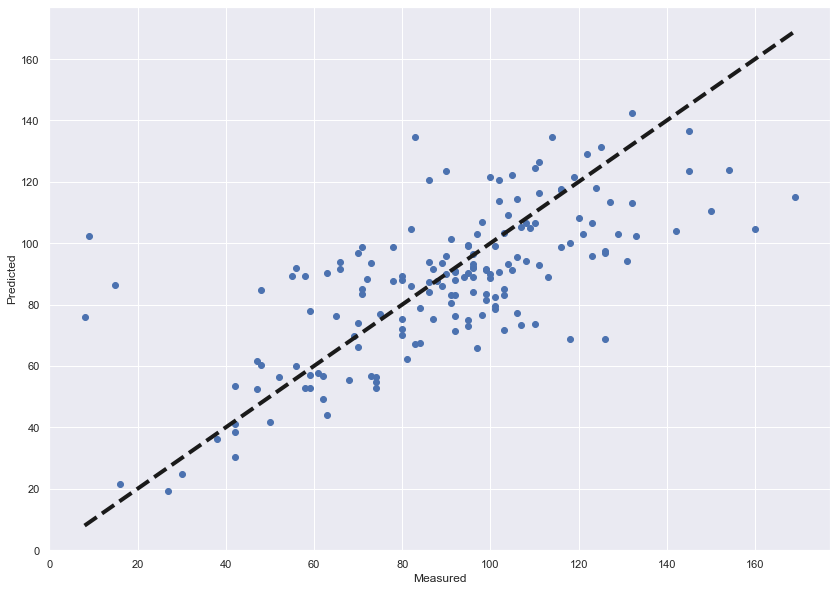

In [417]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Training data Accuracy :  0.5671642301687061
Testing data  Accuracy :  0.4365551902326942


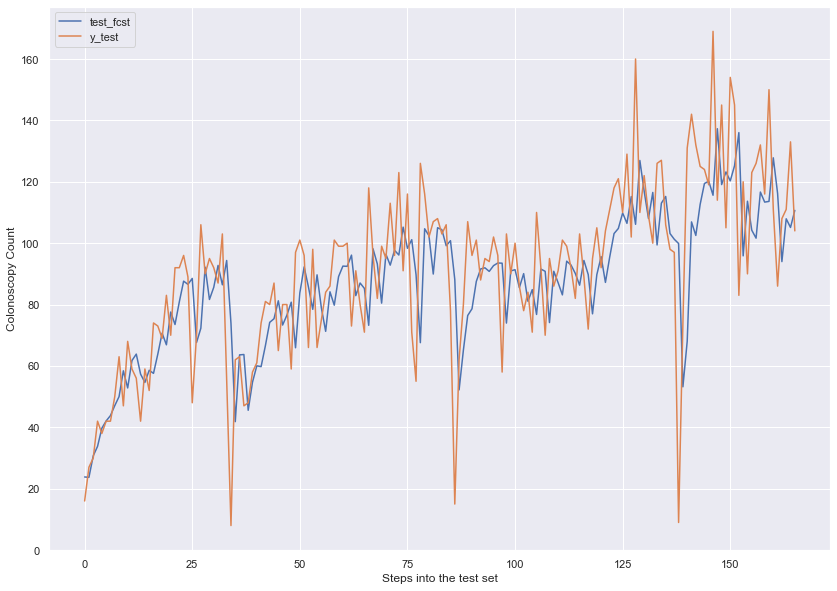

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit Linear Regression model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

#Prediction
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Assign variable for plotting later on
lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Test_Fcst vs test data',fontsize=14)
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy Count')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [392]:
#Prediction
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2_lr = r2_score(y_train, train_fcst)
test_r2_lr = r2_score(y_test, test_fcst)
print(train_r2_lr,test_r2_4)

0.5671642301687061 0.20123564370268177
